# Comparison between the types for the ages and genders

Questions

- What are the differences between the type for the different combinations of ages and genders?
- Do we observe the same changes as globally?

**Table of content**
1. [Differentially expressed genes](#Differentially-expressed-genes)
2. [Stats about the DEG](#Stats-about-the-DEG)
3. [DEG with significant p-value and fold change](#DEG-with-significant-p-value-and-fold-change)
    1. [Log2FC](#Log2FC)
    2. [Z-score](#Z-score)
4. [Co-expression (WGCNA)](#Co-expression-(WGCNA))
    1. [Z-score in modules](#Z-score-in-modules)
    2. [Genes in modules](#Genes-in-modules)
5. [Enrichment analysis](#Enrichment-analysis)
    1. [GO analysis](#GO-analysis)
    2. [KEGG pathways](#KEGG-pathways)

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/filtered_metadata.RData")
load("../results/dge/dge.RData")
load("../results/dge/contrasts.RData")
load("../results/dge/filtered_norm_counts.RData")
load("../results/dge/filtered_z_scores.RData")
load("../results/dge/dge_net_pal2.RData")
load("../results/dge/col_order.RData")
load("../results/dge/annot_col.RData")
load("../results/dge/genes_in_modules.RData")

In [4]:
dir_path = "type-effect/type_gender_age/"

# Extraction of the differentially expressed genes

Extract DEG between GF and SPF for the different ages and genders combinations
- Threshold for adjusted p-value: 0.05
- Threshold for adjusted significant fold change: 1.5

Table with the factors

In [5]:
sub_contrasts = contrasts %>%
    filter(Info == 'GF vs SPF (F, Young)' | 
           Info == 'GF vs SPF (M, Young)' | 
           Info == 'GF vs SPF (F, Middle-aged)' |  
           Info == 'GF vs SPF (M, Middle-aged)' |  
           Info == 'GF vs SPF (F, Old)' |  
           Info == 'GF vs SPF (M, Old)')
sub_contrasts

Info                       Intercept M vs F GF vs SPF Middle Aged vs Young
1 GF vs SPF (F, Young)       0         0      1         0                   
2 GF vs SPF (M, Young)       0         0      1         0                   
3 GF vs SPF (F, Middle-aged) 0         0      1         0                   
4 GF vs SPF (M, Middle-aged) 0         0      1         0                   
5 GF vs SPF (F, Old)         0         0      1         0                   
6 GF vs SPF (M, Old)         0         0      1         0                   
  Old vs Young M & Middle Aged M & Old M & GF GF & Middle Aged GF & Old
1 0            0               0       0      0                0       
2 0            0               0       1      0                0       
3 0            0               0       0      1                0       
4 0            0               0       1      1                0       
5 0            0               0       0      0                1       
6 0            0               0       1      0                1

In [6]:
GF_SPF = lapply(sub_contrasts$Info, function(x) get_dge_results(x, dge, sub_contrasts))
names(GF_SPF) = sub_contrasts$Info

Extract the log2FC of the DEG

In [7]:
deg = extract_DEG_log2FC(GF_SPF, dir_path)

# Stats about the DEG

Using type as id variables


GF vs SPF (F, Young)
All DEG (Wald padj < 0.05)                            256                 
All over-expressed genes (Wald padj < 0.05 & FC > 0)  146                 
All under-expressed genes (Wald padj < 0.05 & FC < 0) 110                 
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               145                 
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    92                 
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  53                 
                                                      GF vs SPF (M, Young)
All DEG (Wald padj < 0.05)                            127                 
All over-expressed genes (Wald padj < 0.05 & FC > 0)   80                 
All under-expressed genes (Wald padj < 0.05 & FC < 0)  47                 
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)                89                 
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    58                 
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  31                 
                                                      GF vs SPF (F, Middle-aged)
All DEG (Wald padj < 0.05)                            877                       
All over-expressed genes (Wald padj < 0.05 & FC > 0)  375                       
All under-expressed genes (Wald padj < 0.05 & FC < 0) 502                       
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               352                       
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)   136                       
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5) 216                       
                                                      GF vs SPF (M, Middle-aged)
All DEG (Wald padj < 0.05)                            426                       
All over-expressed genes (Wald padj < 0.05 & FC > 0)  171                       
All under-expressed genes (Wald padj < 0.05 & FC < 0) 255                       
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               244                       
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    84                       
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5) 160                       
                                                      GF vs SPF (F, Old)
All DEG (Wald padj < 0.05)                            1930              
All over-expressed genes (Wald padj < 0.05 & FC > 0)   866              
All under-expressed genes (Wald padj < 0.05 & FC < 0) 1064              
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)                999              
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    311              
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  688              
                                                      GF vs SPF (M, Old)
All DEG (Wald padj < 0.05)                            3329              
All over-expressed genes (Wald padj < 0.05 & FC > 0)  1496              
All under-expressed genes (Wald padj < 0.05 & FC < 0) 1833              
DEG (Wald padj < 0.05 & abs(FC) >= 1.5)               1265              
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)    324              
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)  941

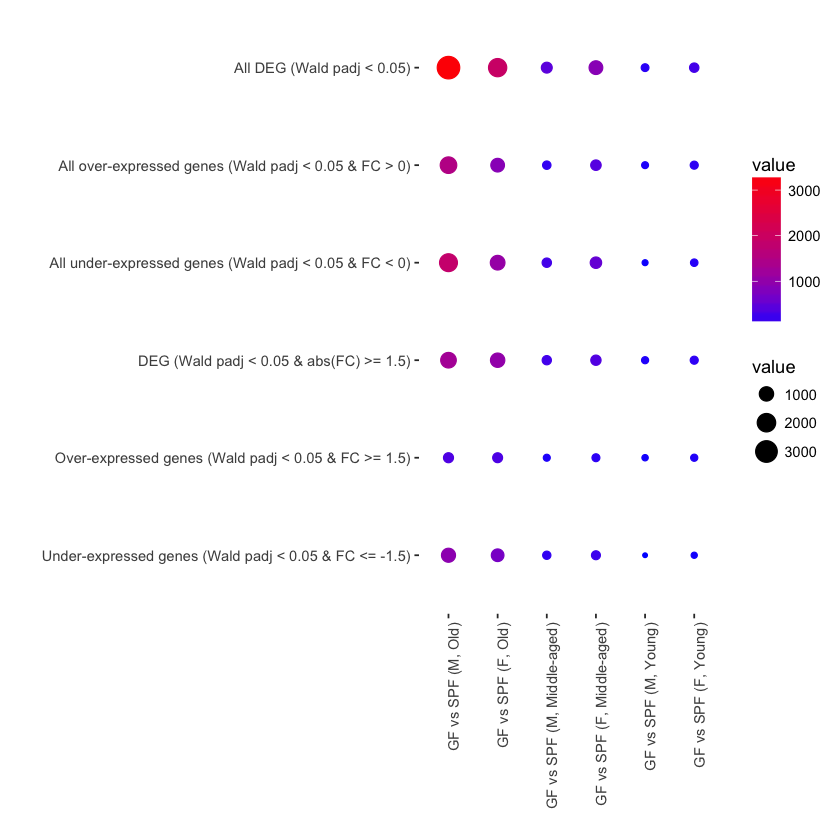

In [8]:
deg = extract_DEG_stats(deg)
deg$stat

All DEG (Wald padj < 0.05)

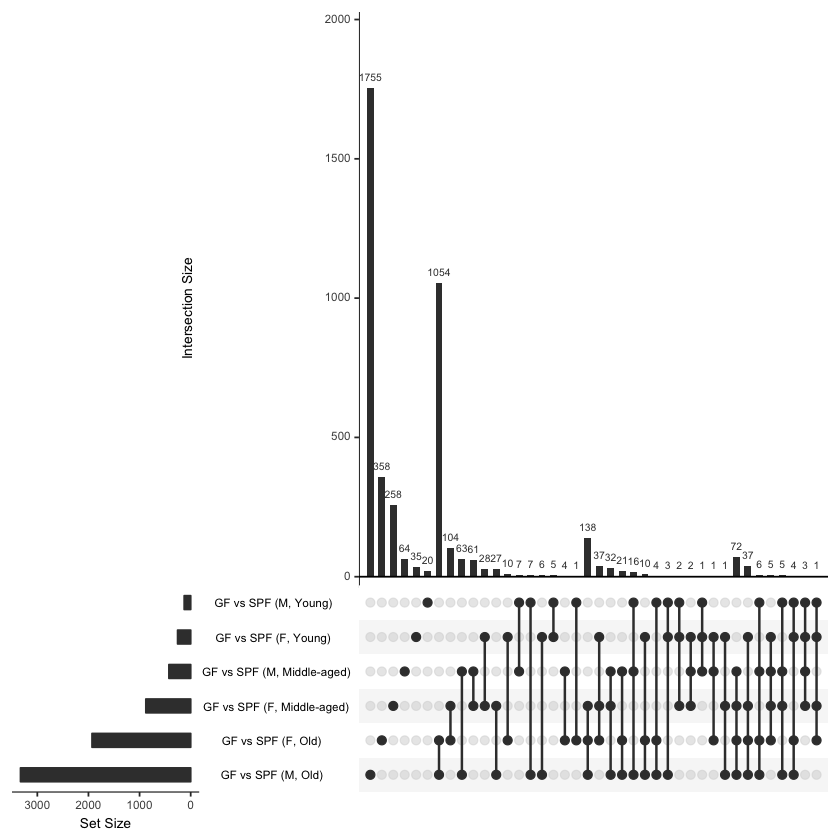

In [9]:
plot_sign_DEG_upset(deg)

DEG (Wald padj < 0.05 & abs(FC) > 1.5)

pdf 
  2

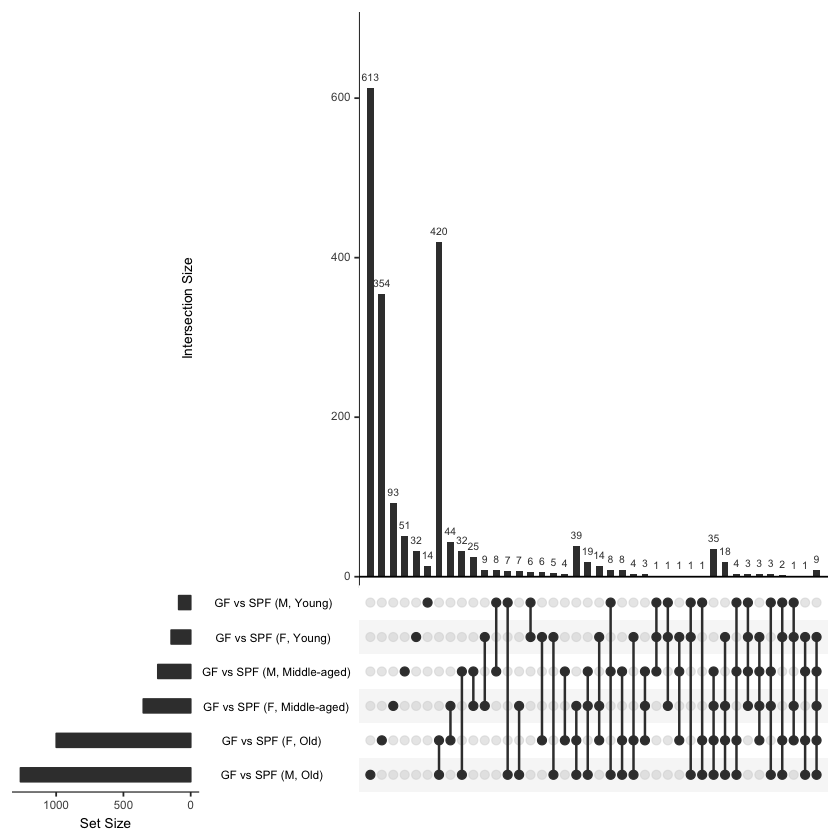

In [10]:
pdf(paste('../results/dge/', dir_path, '/sign_FC_DEG_upset.pdf', sep=''))
plot_sign_FC_DEG_upset(deg)
dev.off()
plot_sign_FC_DEG_upset(deg)

# DEG with significant p-value and fold change

## Log2FC

comp      gender age        
GF vs SPF (F, Young)       GF VS SPF F      Young      
GF vs SPF (M, Young)       GF VS SPF M      Young      
GF vs SPF (F, Middle-aged) GF VS SPF F      Middle-Aged
GF vs SPF (M, Middle-aged) GF VS SPF M      Middle-Aged
GF vs SPF (F, Old)         GF VS SPF F      Old        
GF vs SPF (M, Old)         GF VS SPF M      Old

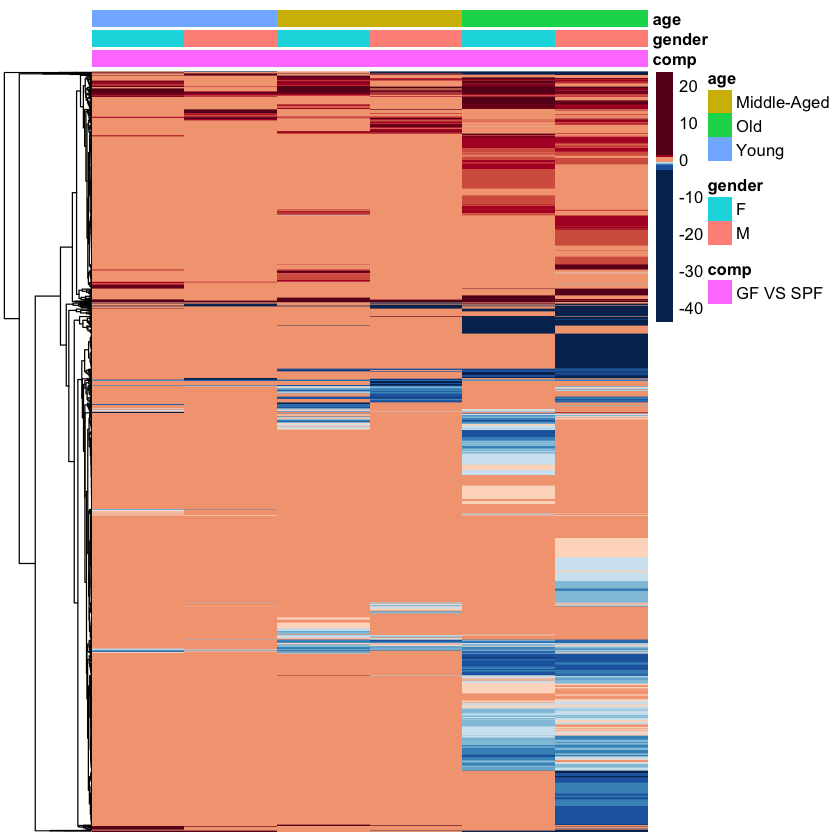

In [11]:
data = deg$sign_fc_deg %>% select(-genes)
fc_annot = data.frame(comp = rep("GF VS SPF",2),
                      gender = rep(c("F","M"), 3),
                      age = c(rep("Young", 2), rep("Middle-Aged", 2), rep("Old", 2)),
                      row.names = colnames(data))
fc_annot
plot_fc_heatmap(data, fc_annot)

## Z-score

In [12]:
comps = list(
    "GF vs SPF (F, Young)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF vs SPF (F, Middle-aged)" = c(grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF vs SPF (F, Old)" = c(grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF vs SPF (M, Young)" = c(grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF vs SPF (M, Middle-aged)" = c(grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "GF vs SPF (M, Old)" = c(grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE))
)

### Column order: gender - age - type

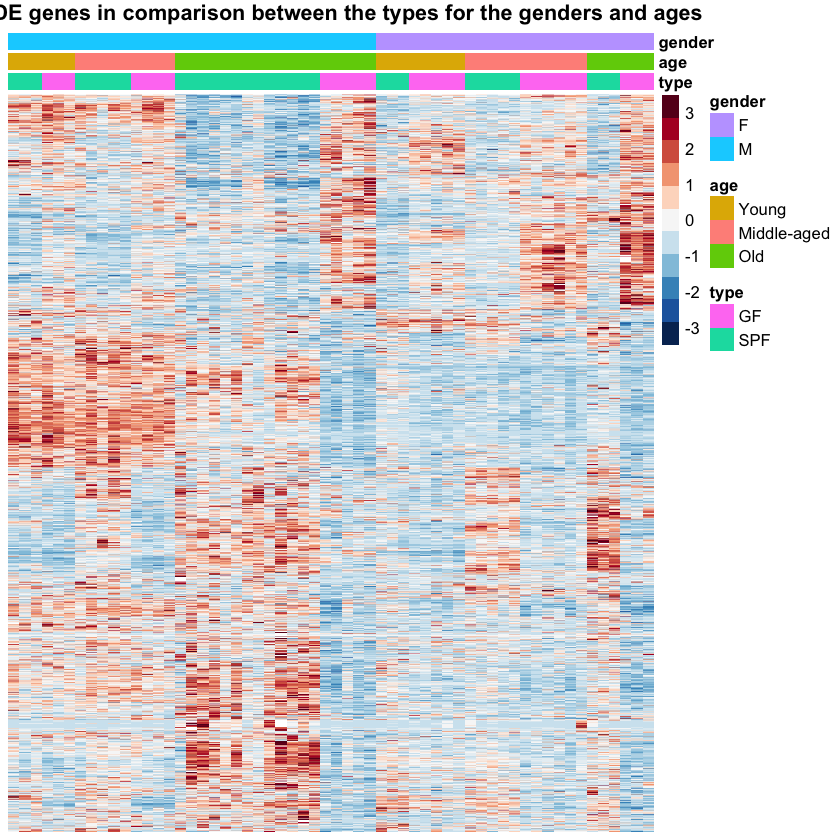

In [13]:
plot_z_score_heatmap(z_scores,
                     deg$sign_fc_deg$genes,
                     col_order$gat,
                     annot_col$gat,
                     "All DE genes in comparison between the types for the genders and ages",
                     col_order$gat)

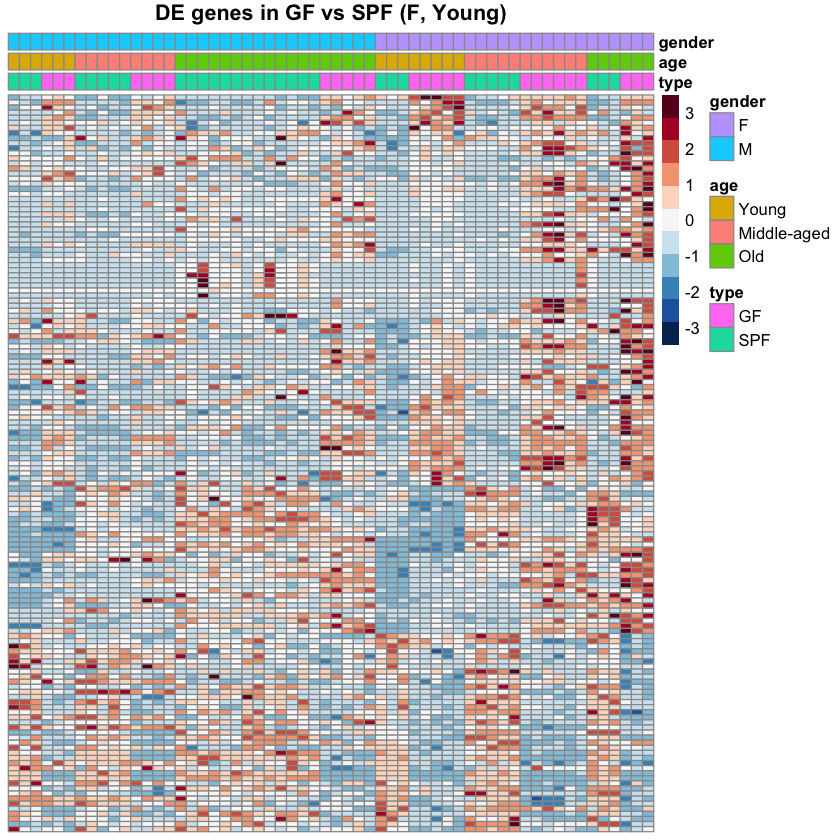

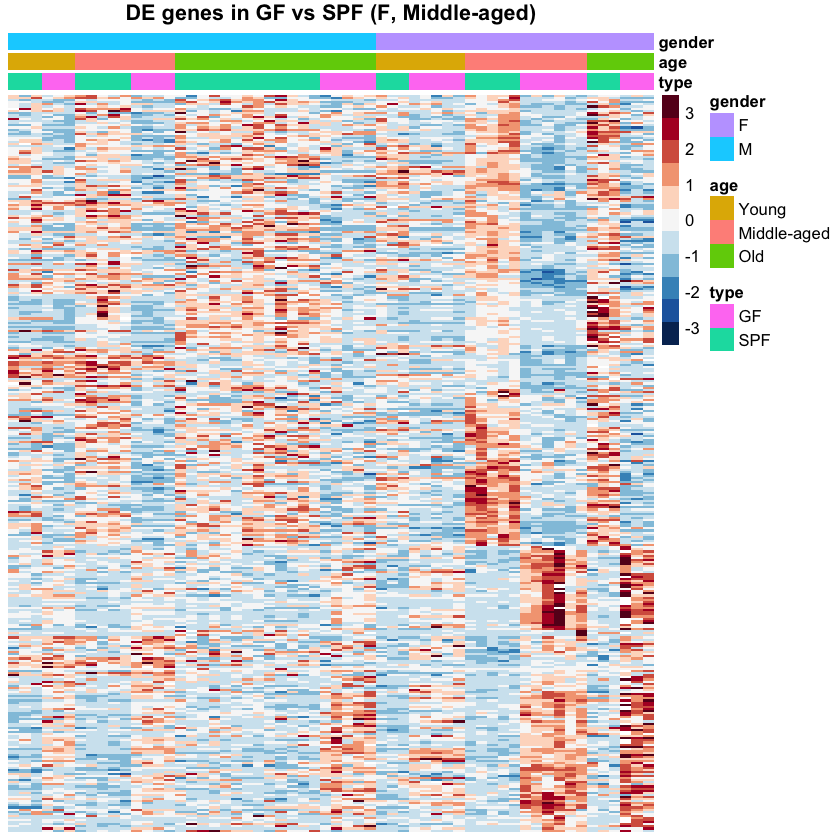

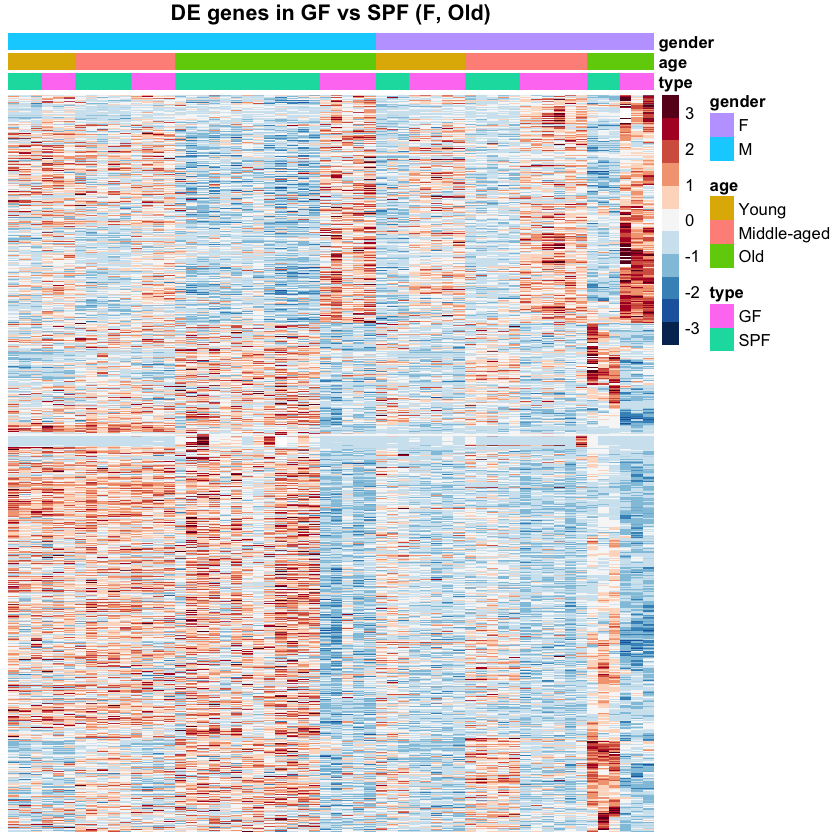

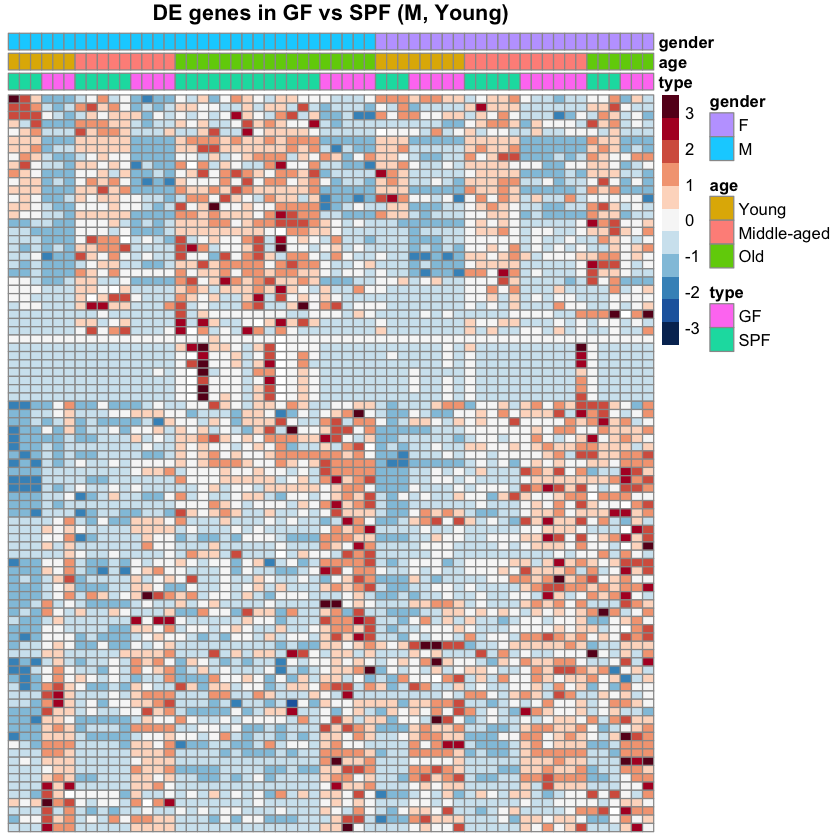

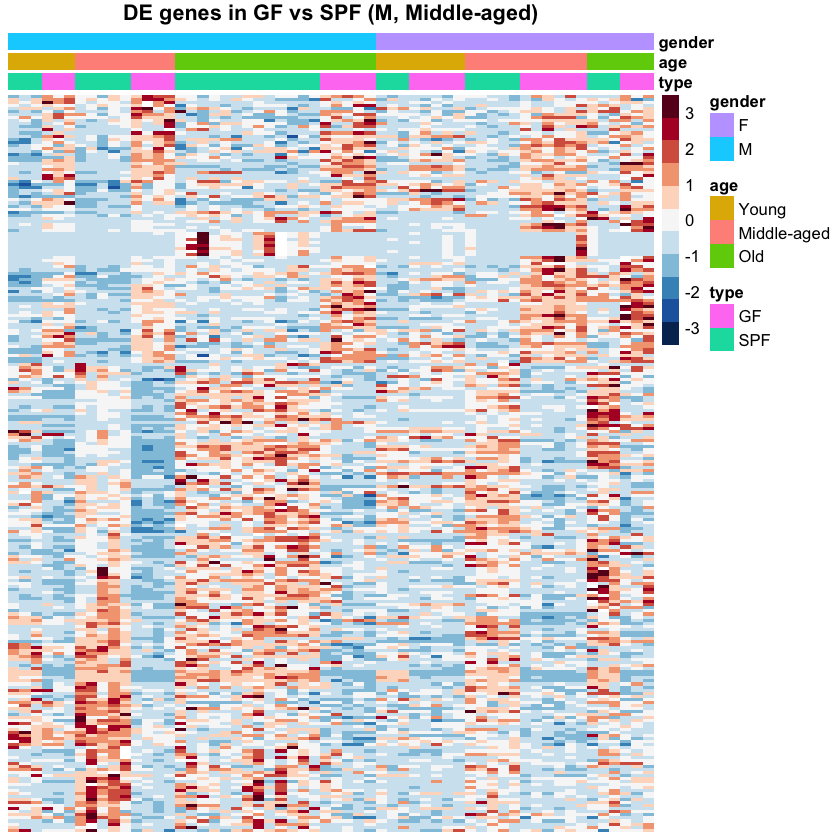

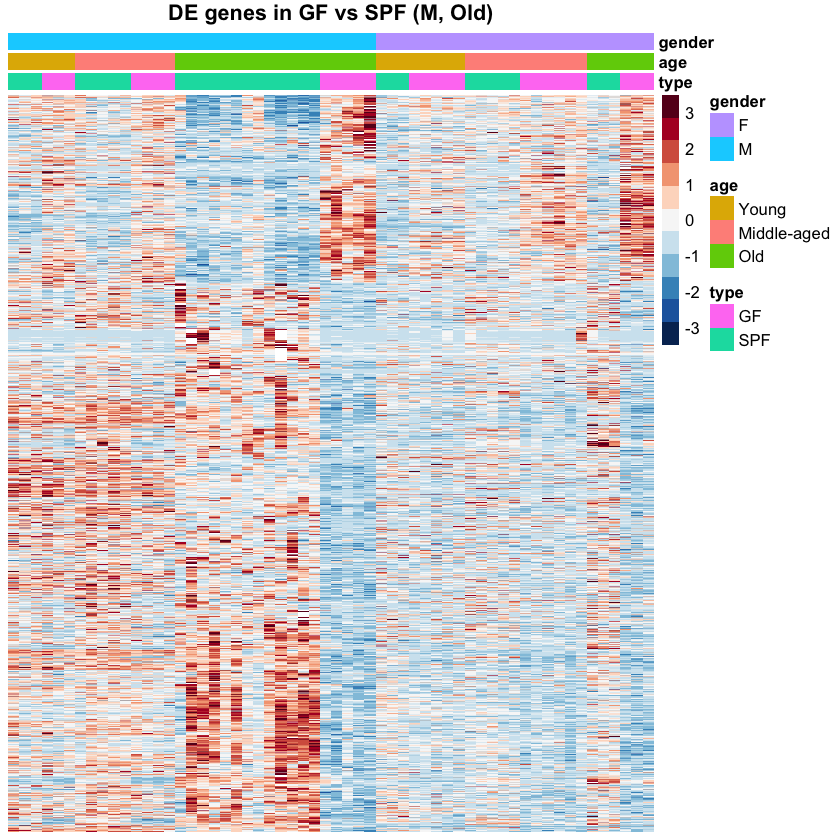

In [14]:
for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$gat,
        annot_col$gat,
        paste("DE genes in", comp),
        comps[[comp]])
}

### Column order: age - gender - type

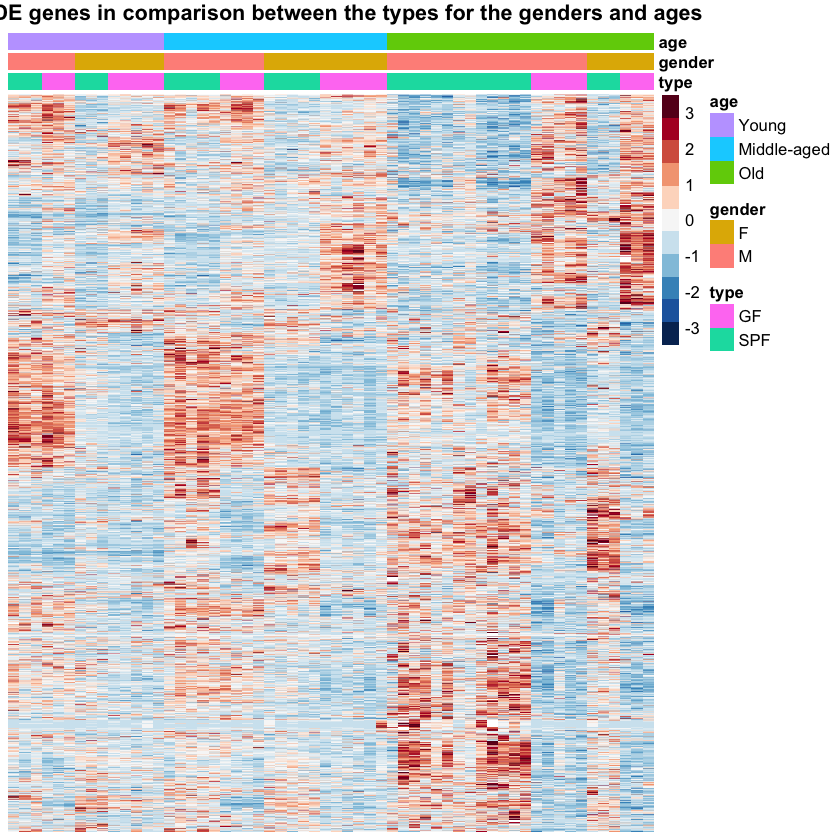

In [15]:
plot_z_score_heatmap(z_scores,
                     deg$sign_fc_deg$genes,
                     col_order$agt,
                     annot_col$agt,
                     "All DE genes in comparison between the types for the genders and ages",
                     col_order$agt)

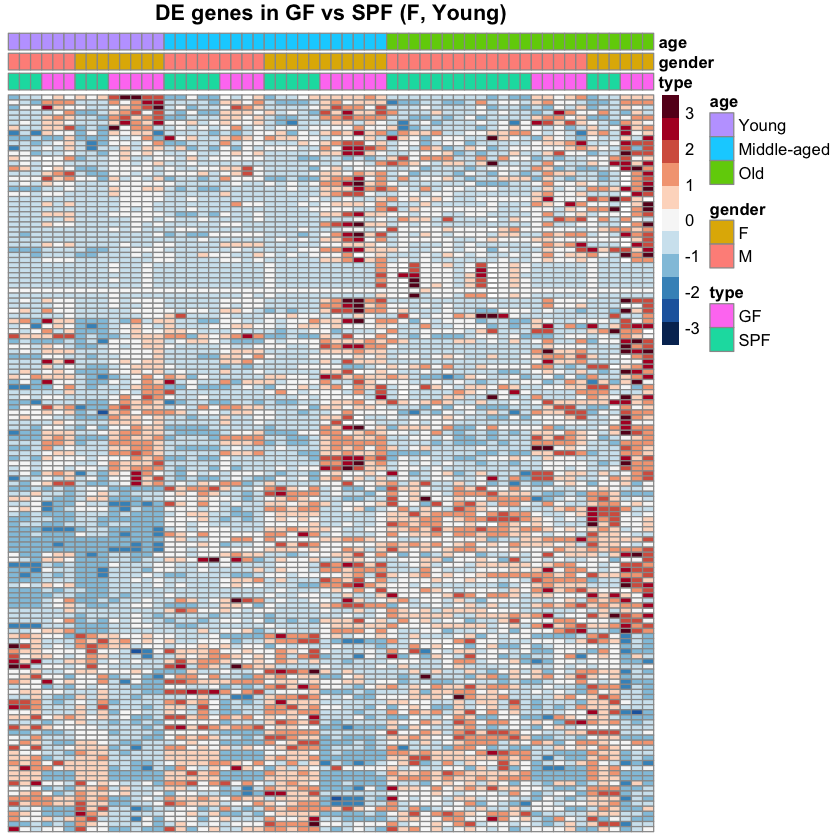

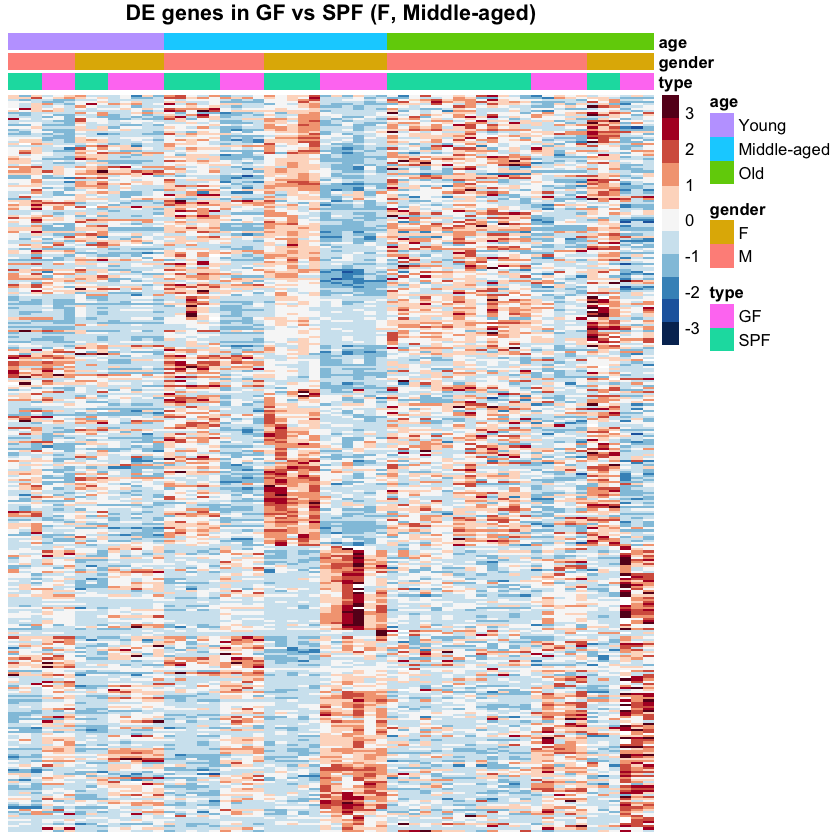

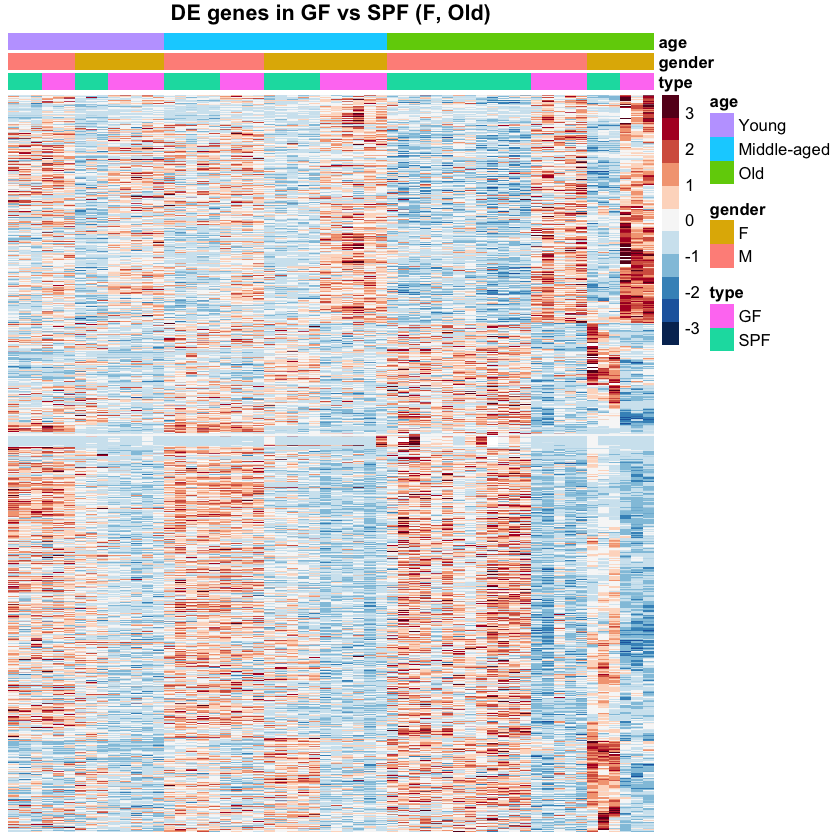

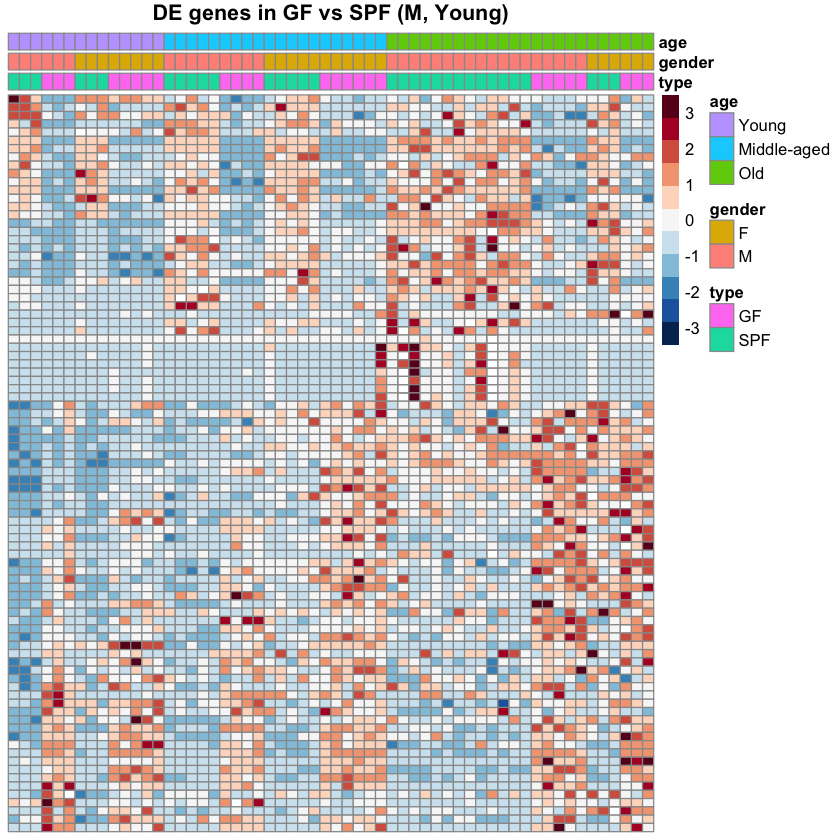

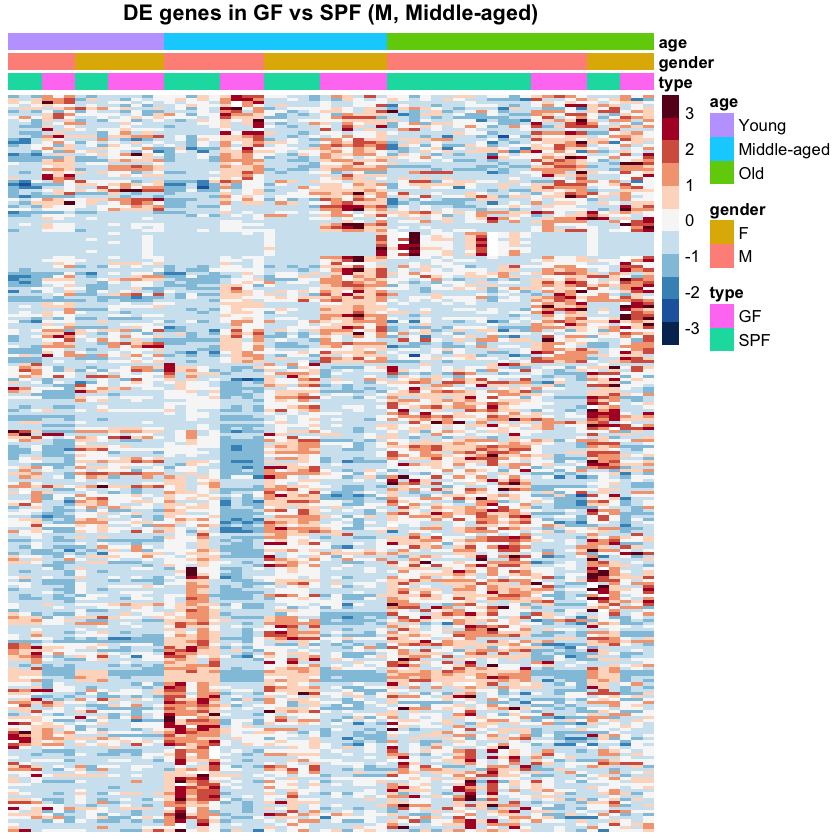

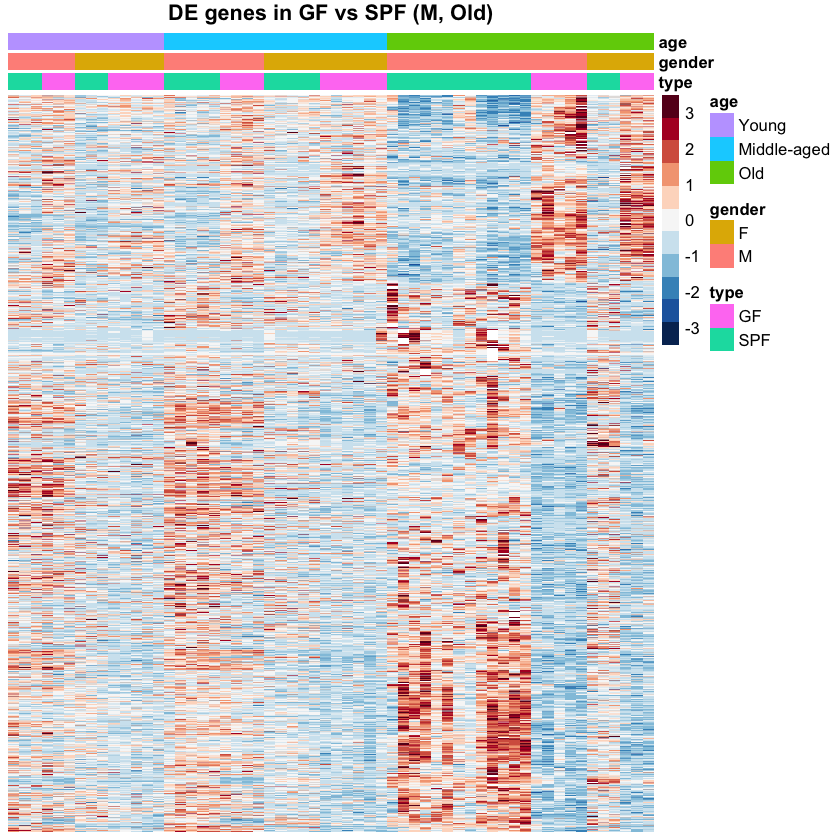

In [16]:
for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$agt,
        annot_col$agt,
        paste("DE genes in", comp),
        comps[[comp]])
}

# Co-expression (WGCNA)

## Z-score in modules

In [17]:
comps = c("GF vs SPF (F, Young)", "GF vs SPF (F, Middle-aged)", "GF vs SPF (F, Old)",
          "GF vs SPF (M, Young)", "GF vs SPF (M, Middle-aged)", "GF vs SPF (M, Old)")

### Column order: gender - age - type

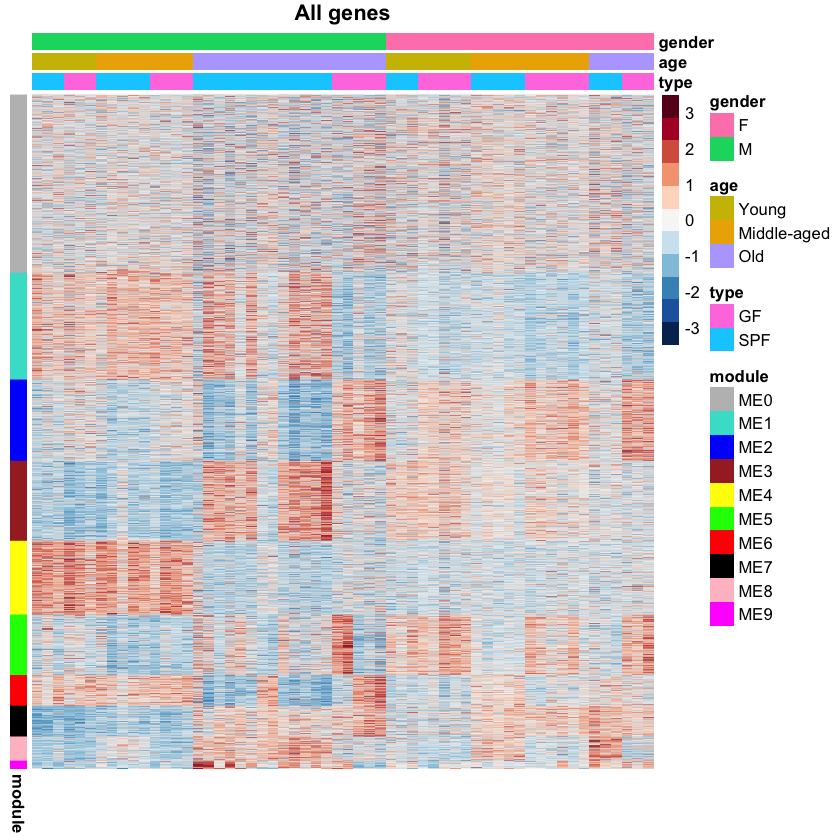

In [18]:
plot_z_score_heatmap_with_modules(z_scores,
                                  rownames(z_scores),
                                  col_order$gat,
                                  annot_col$gat,
                                  genes_in_modules,
                                  "All genes")

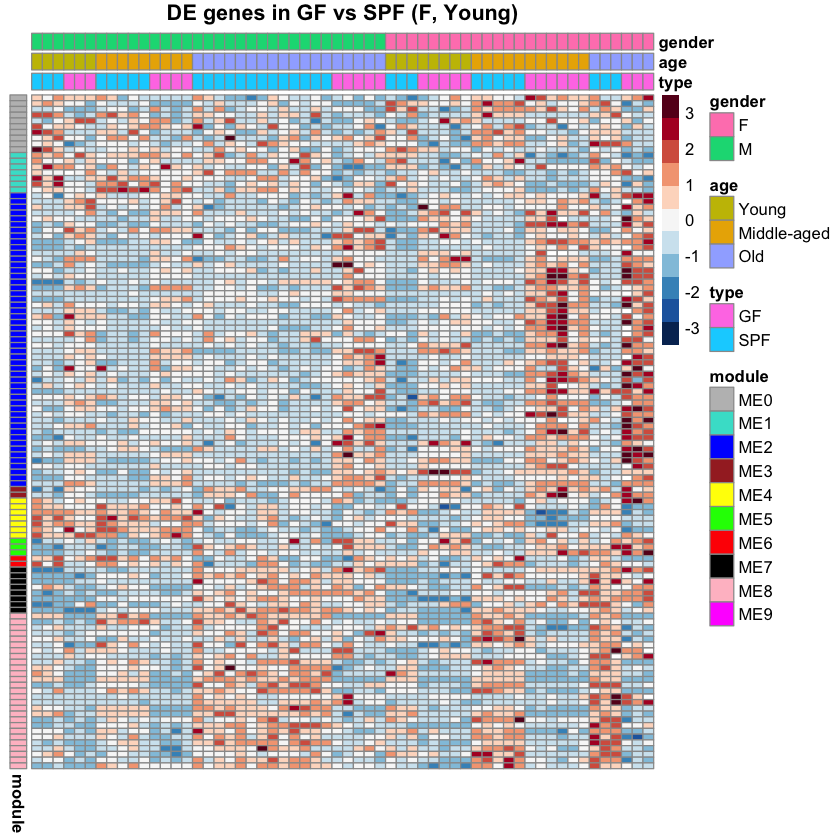

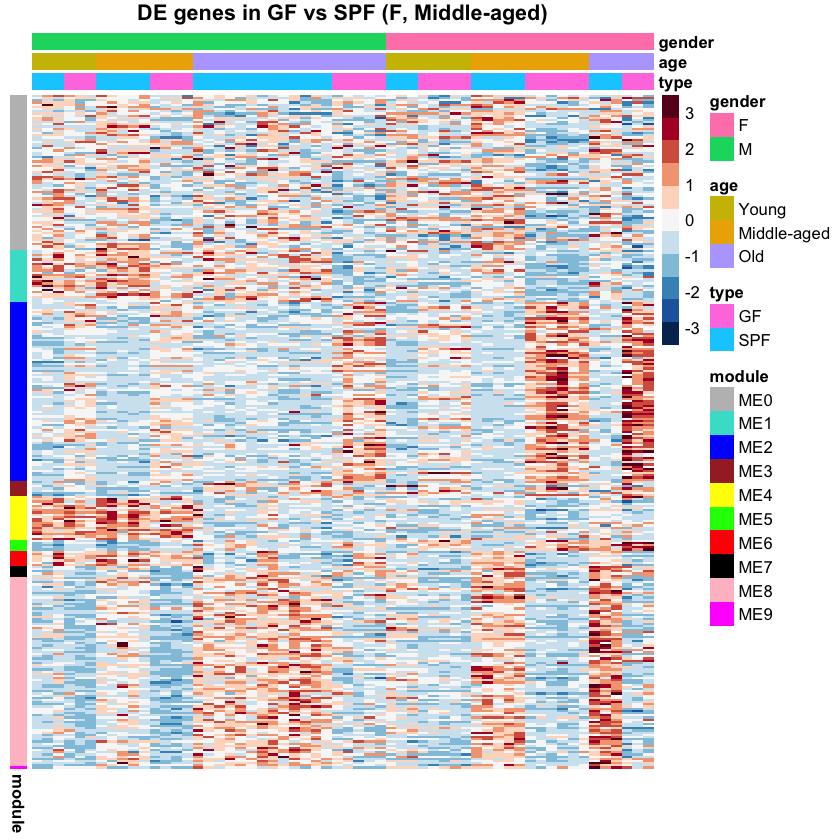

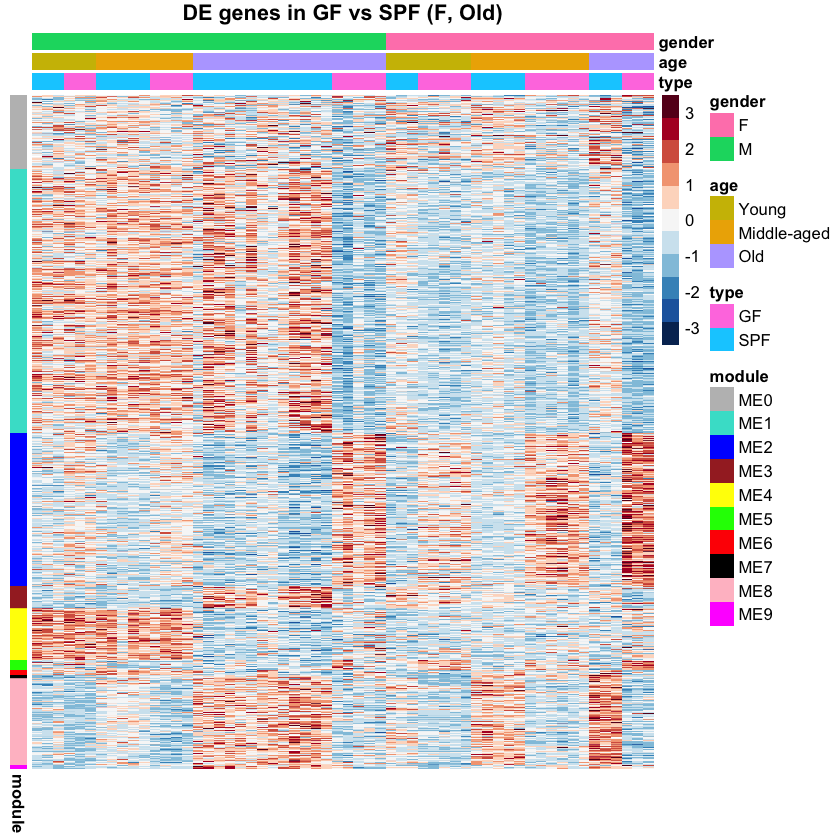

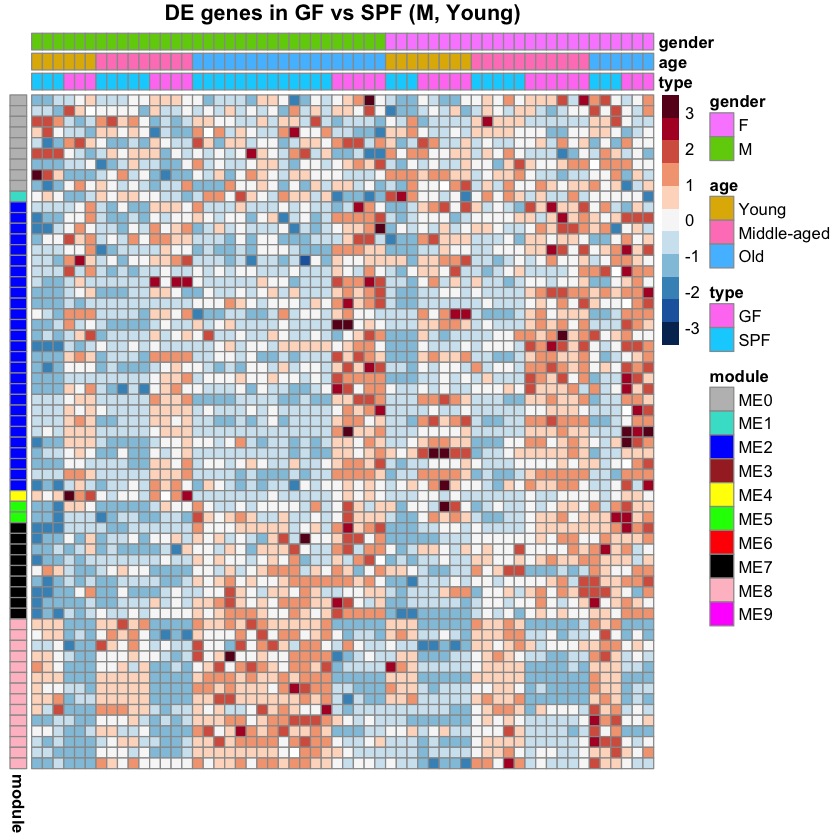

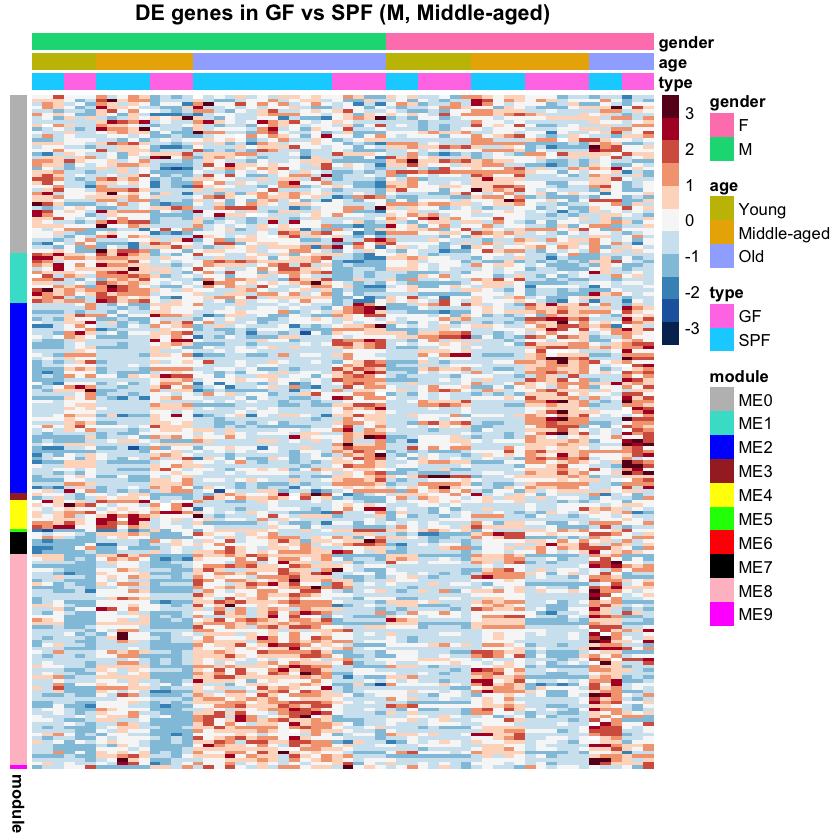

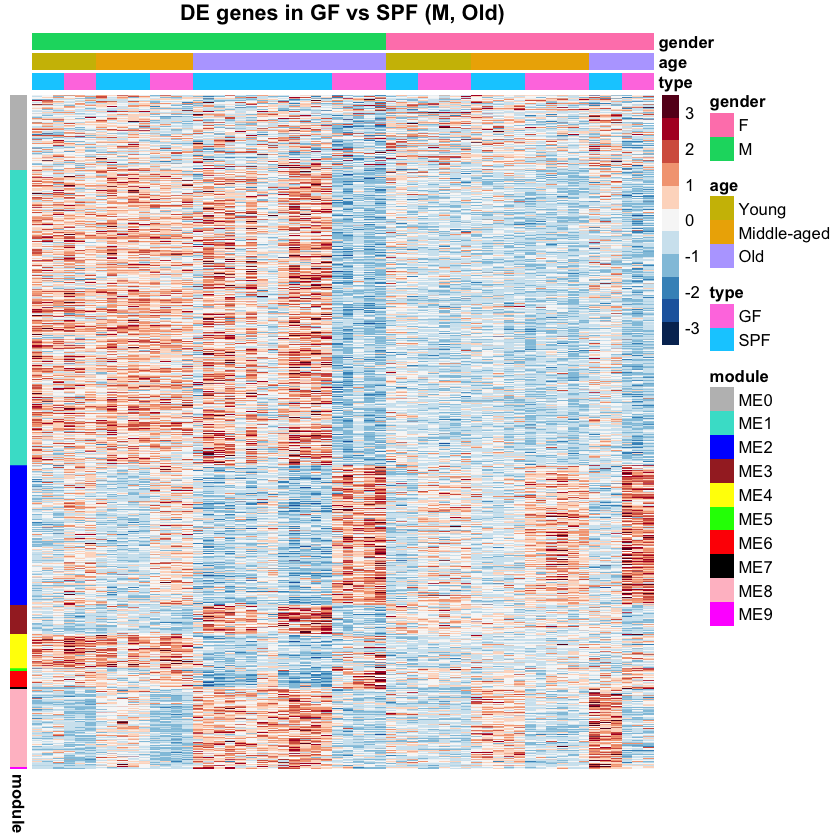

In [19]:
for(comp in comps){
    plot_z_score_heatmap_with_modules(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$gat,
        annot_col$gat,
        genes_in_modules,
        paste("DE genes in", comp))
}

### Column order: age - gender - type

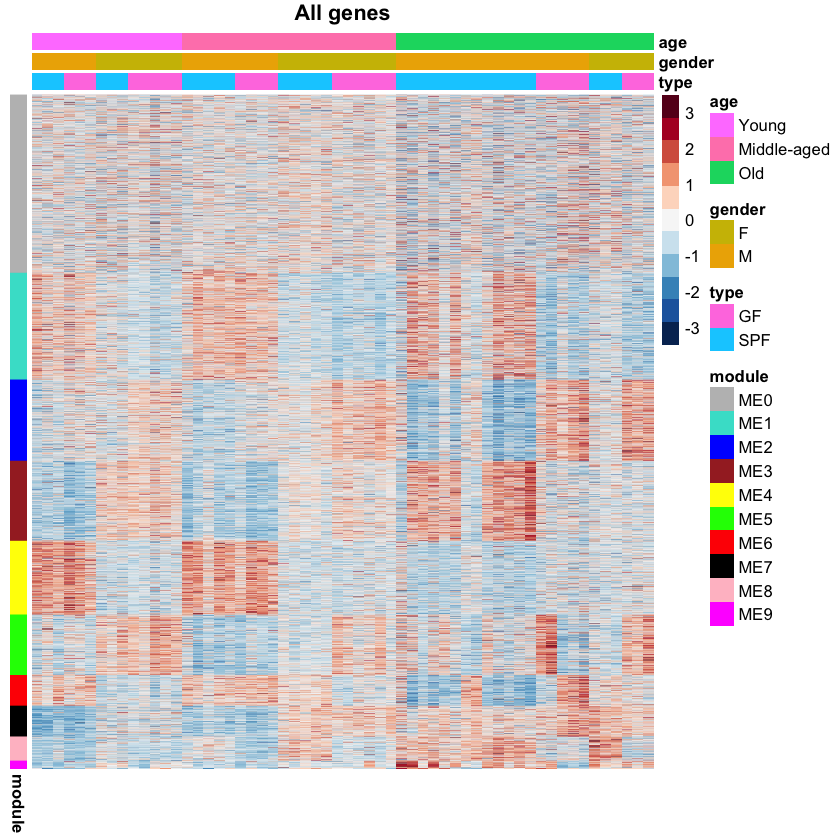

In [20]:
plot_z_score_heatmap_with_modules(z_scores,
    rownames(z_scores),
    col_order$agt,
    annot_col$agt,
    genes_in_modules,
    "All genes")

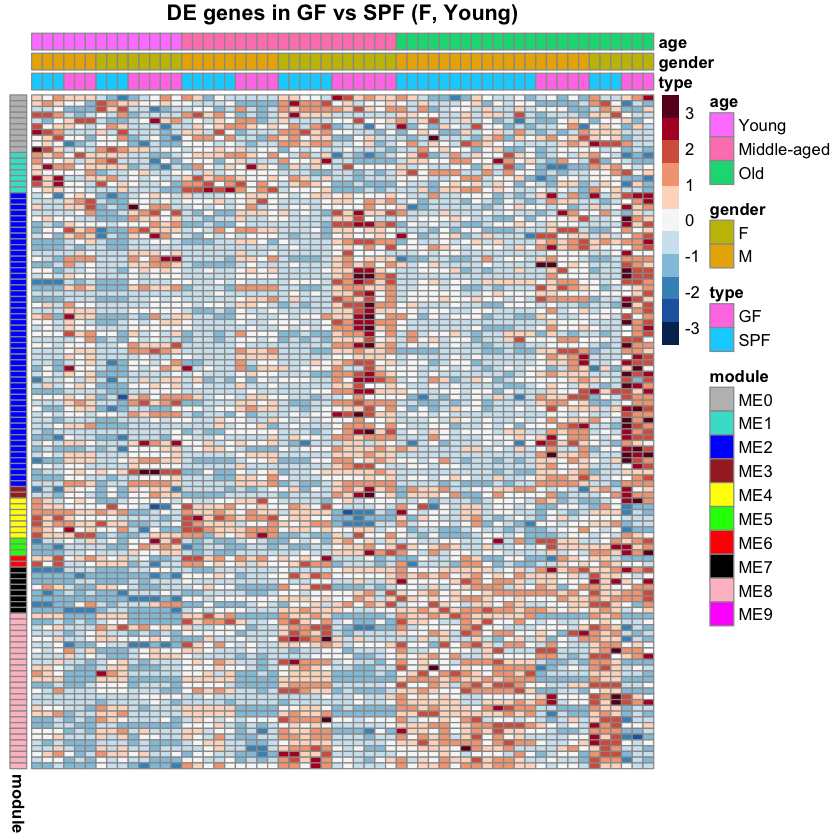

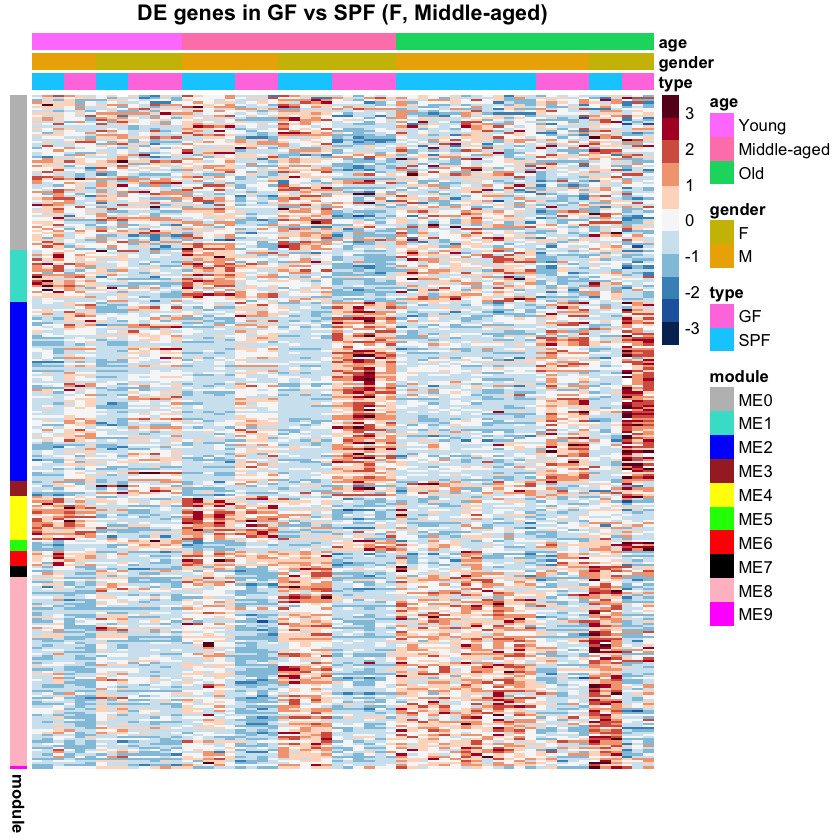

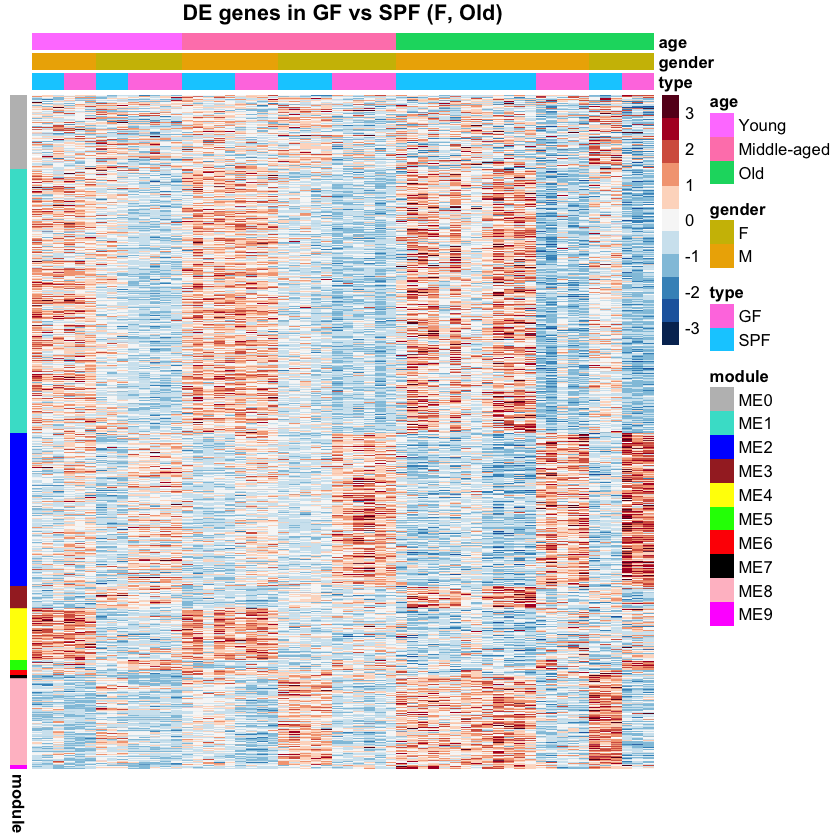

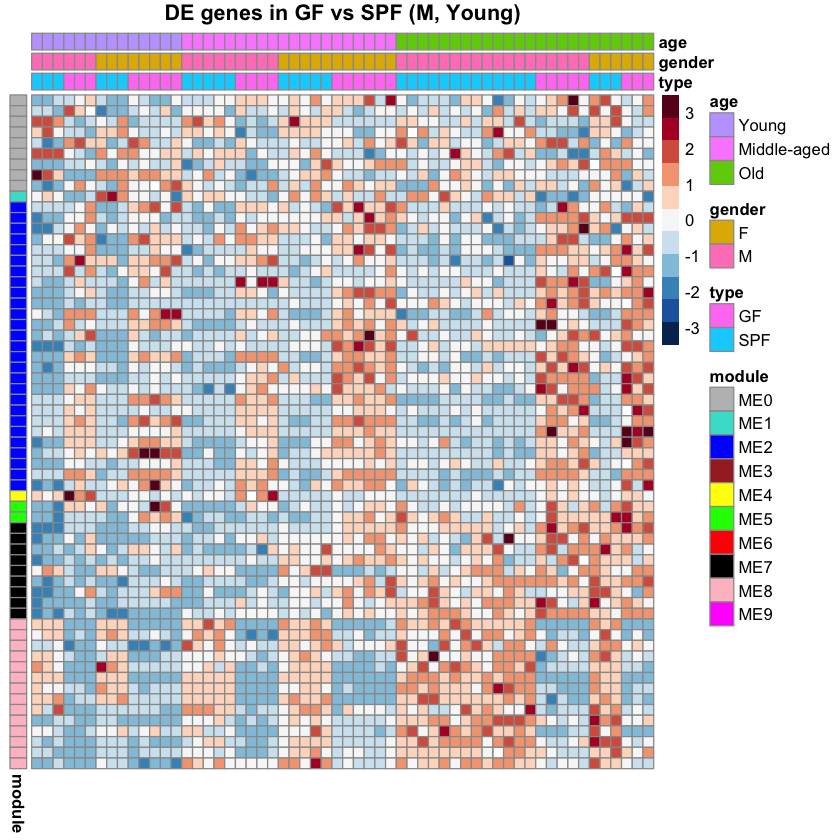

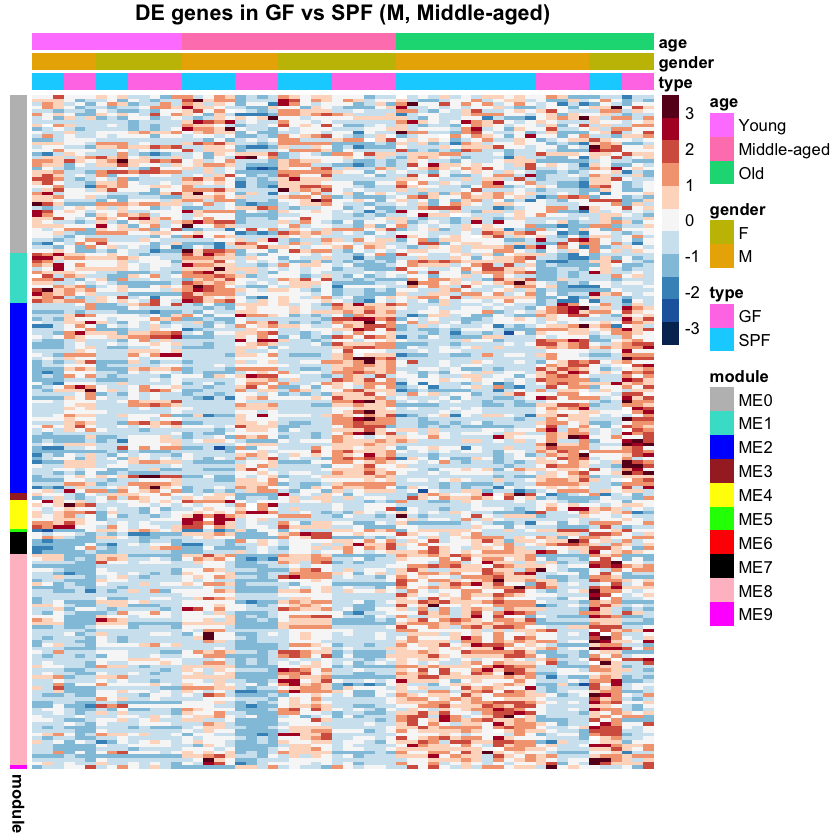

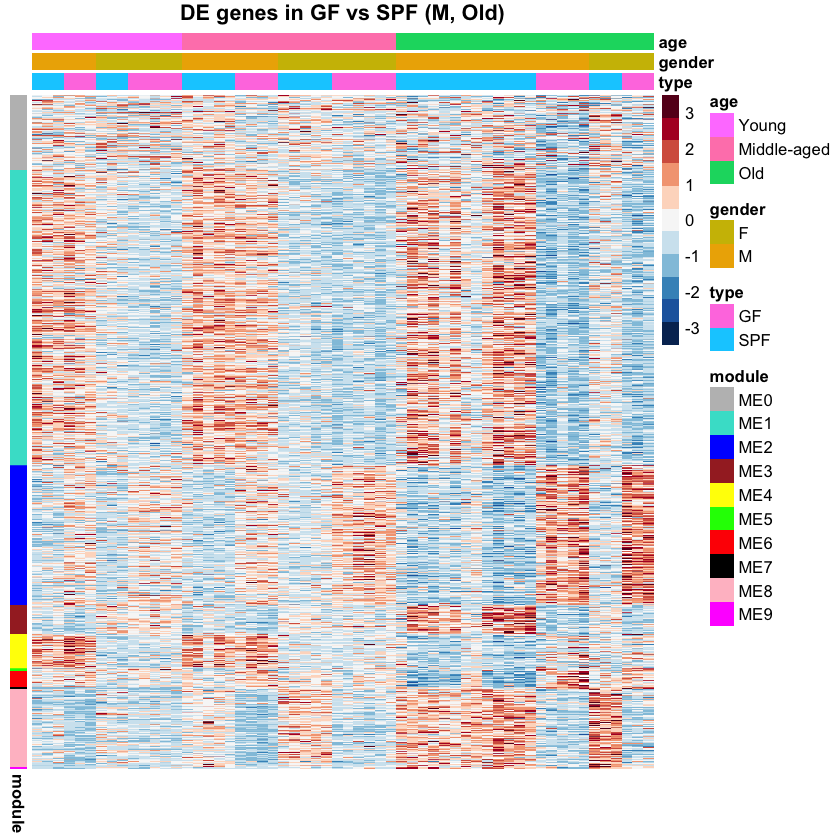

In [21]:
for(comp in comps){
    plot_z_score_heatmap_with_modules(z_scores,
        deg$sign_fc_deg %>% filter(!is.na((!!as.name(comp)))) %>% pull(genes),
        col_order$agt,
        annot_col$agt,
        genes_in_modules,
        paste("DE genes in", comp))
}

## Genes in modules

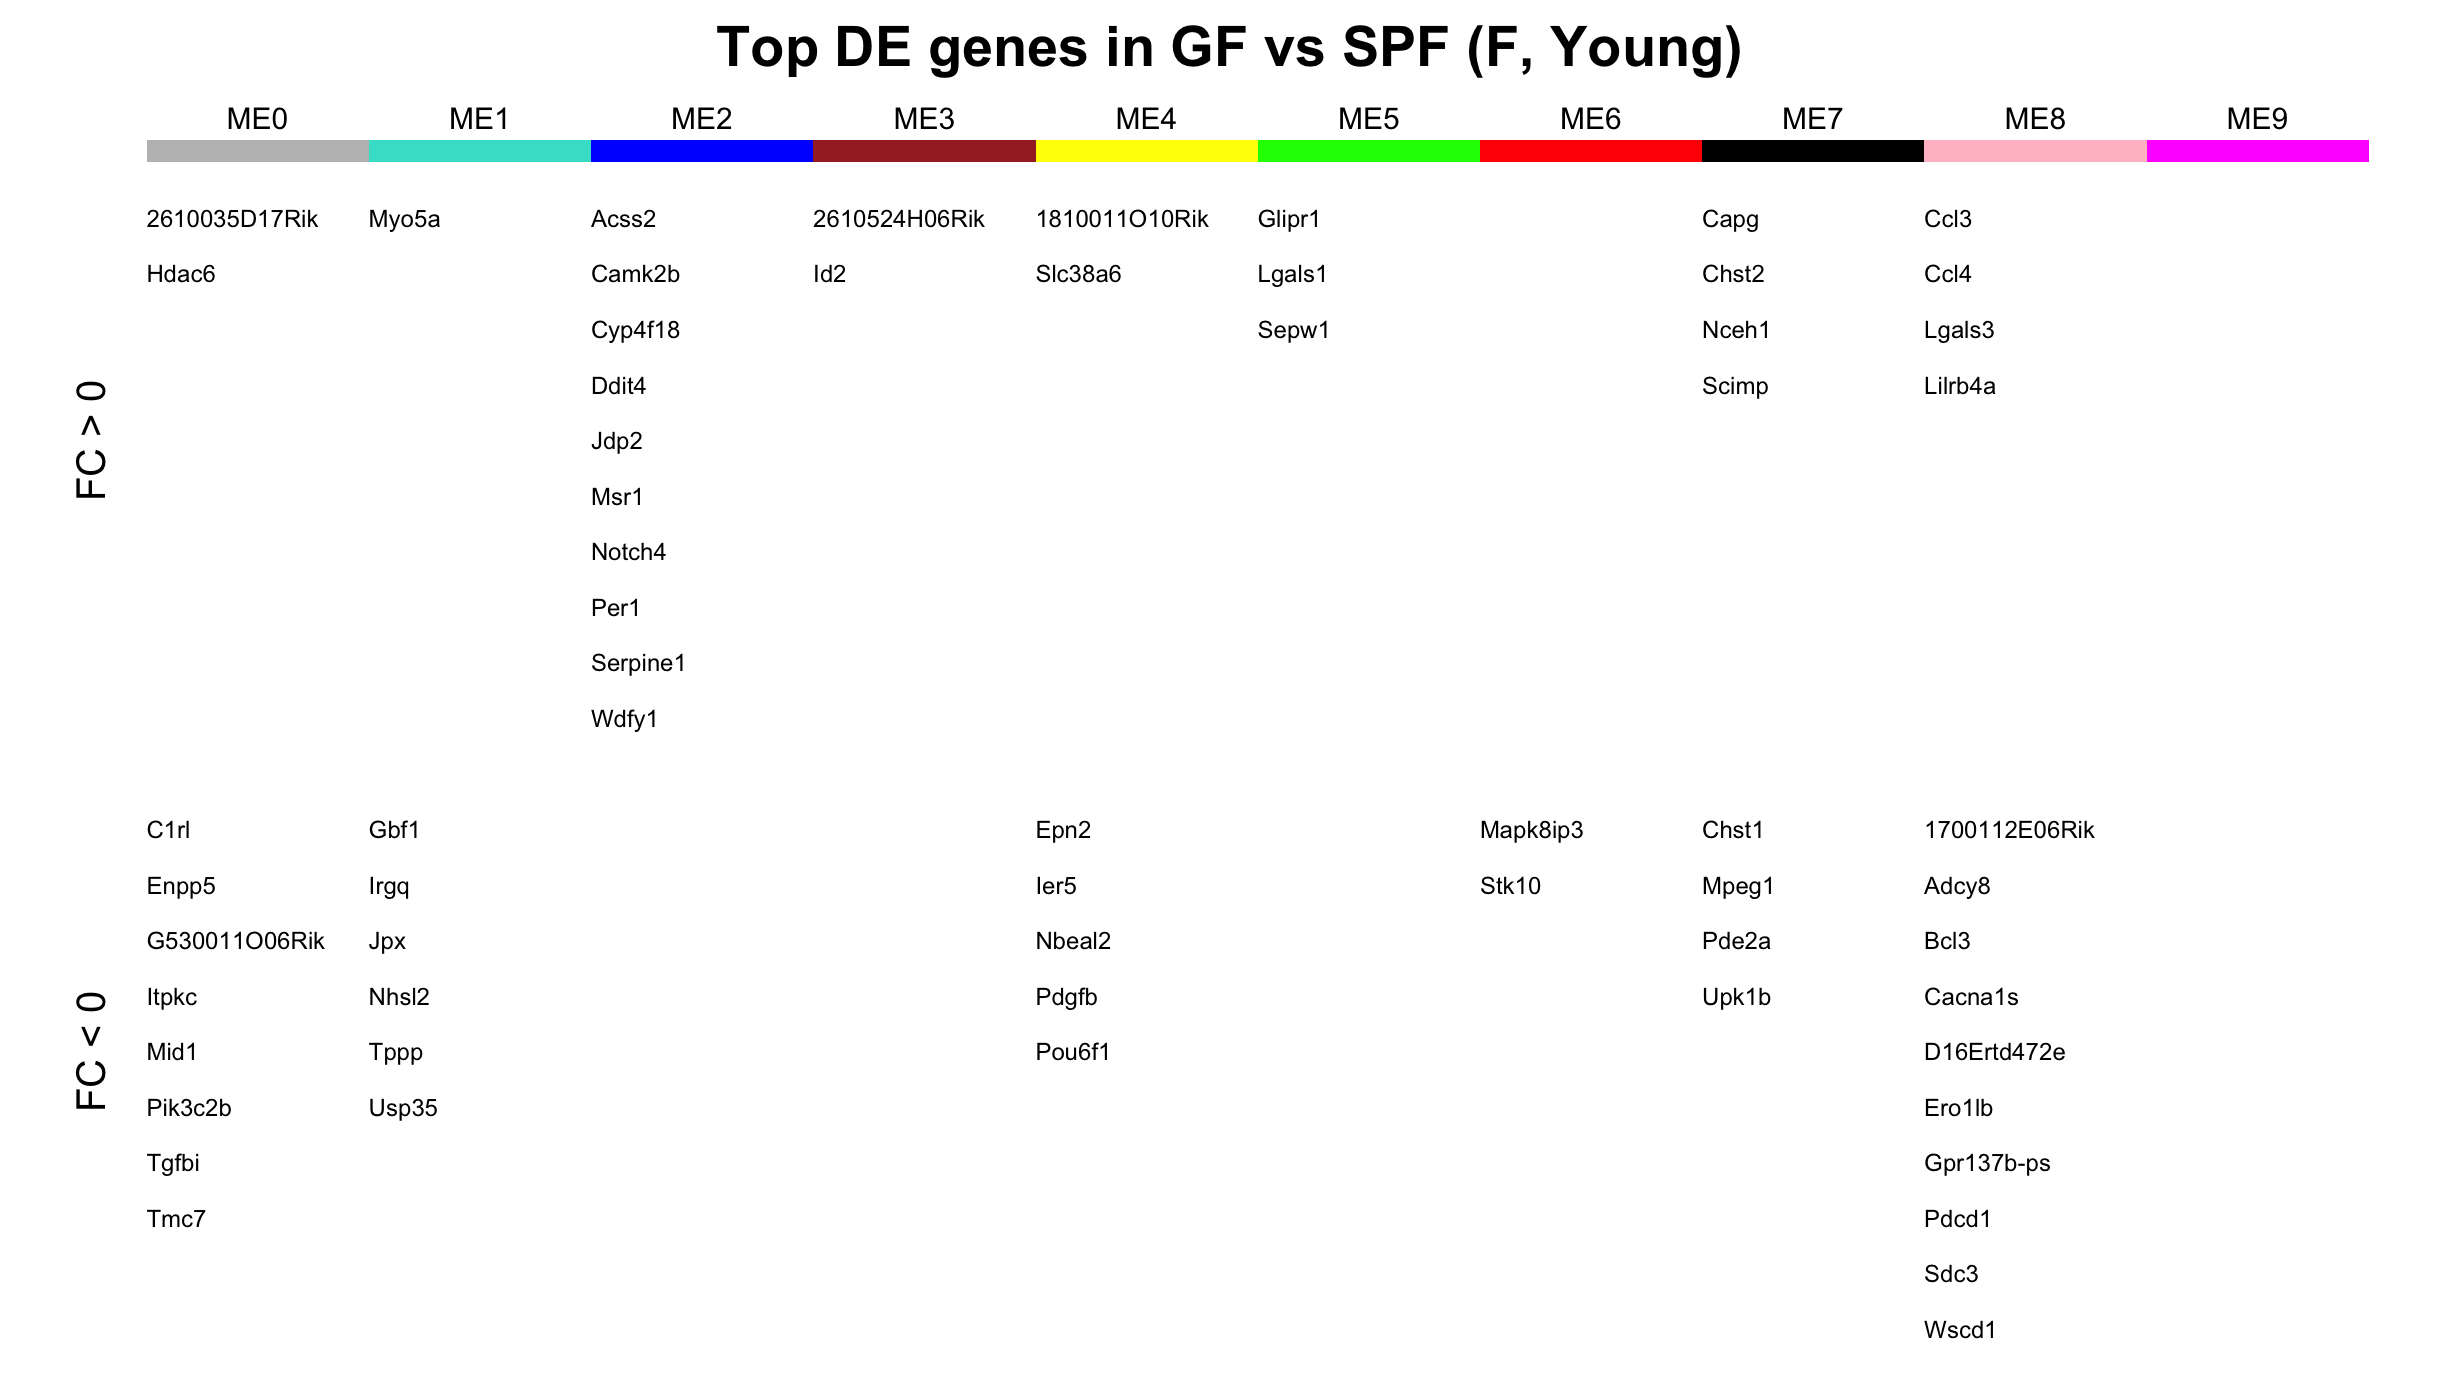

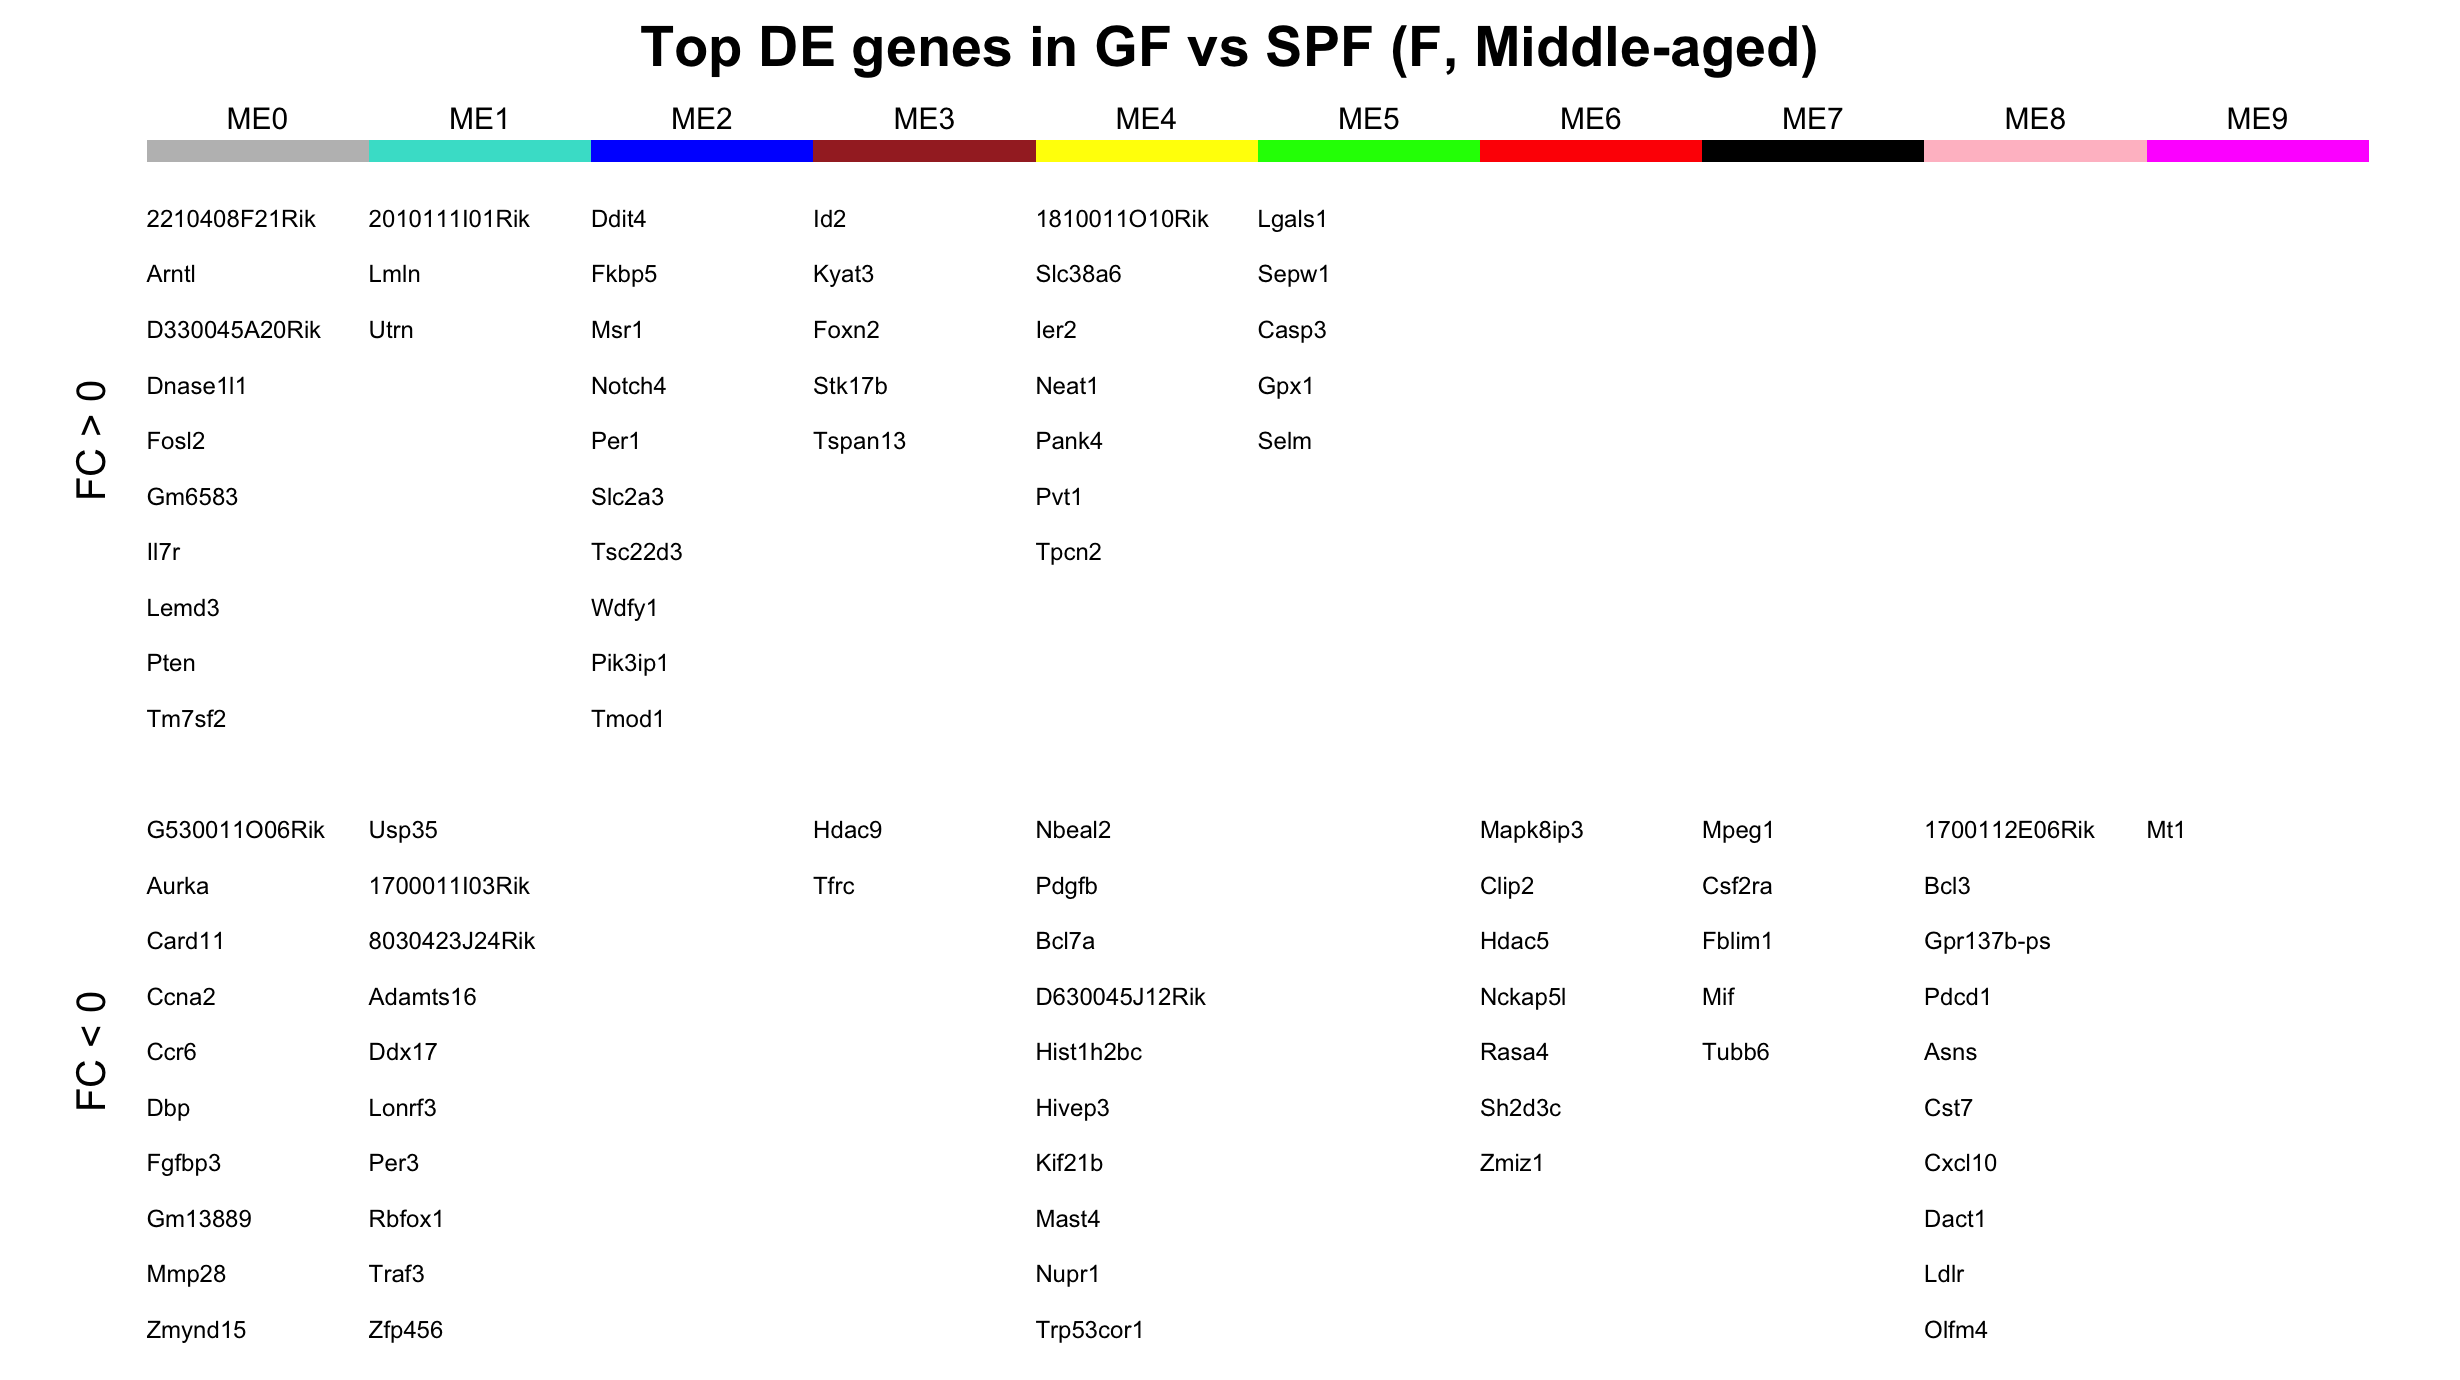

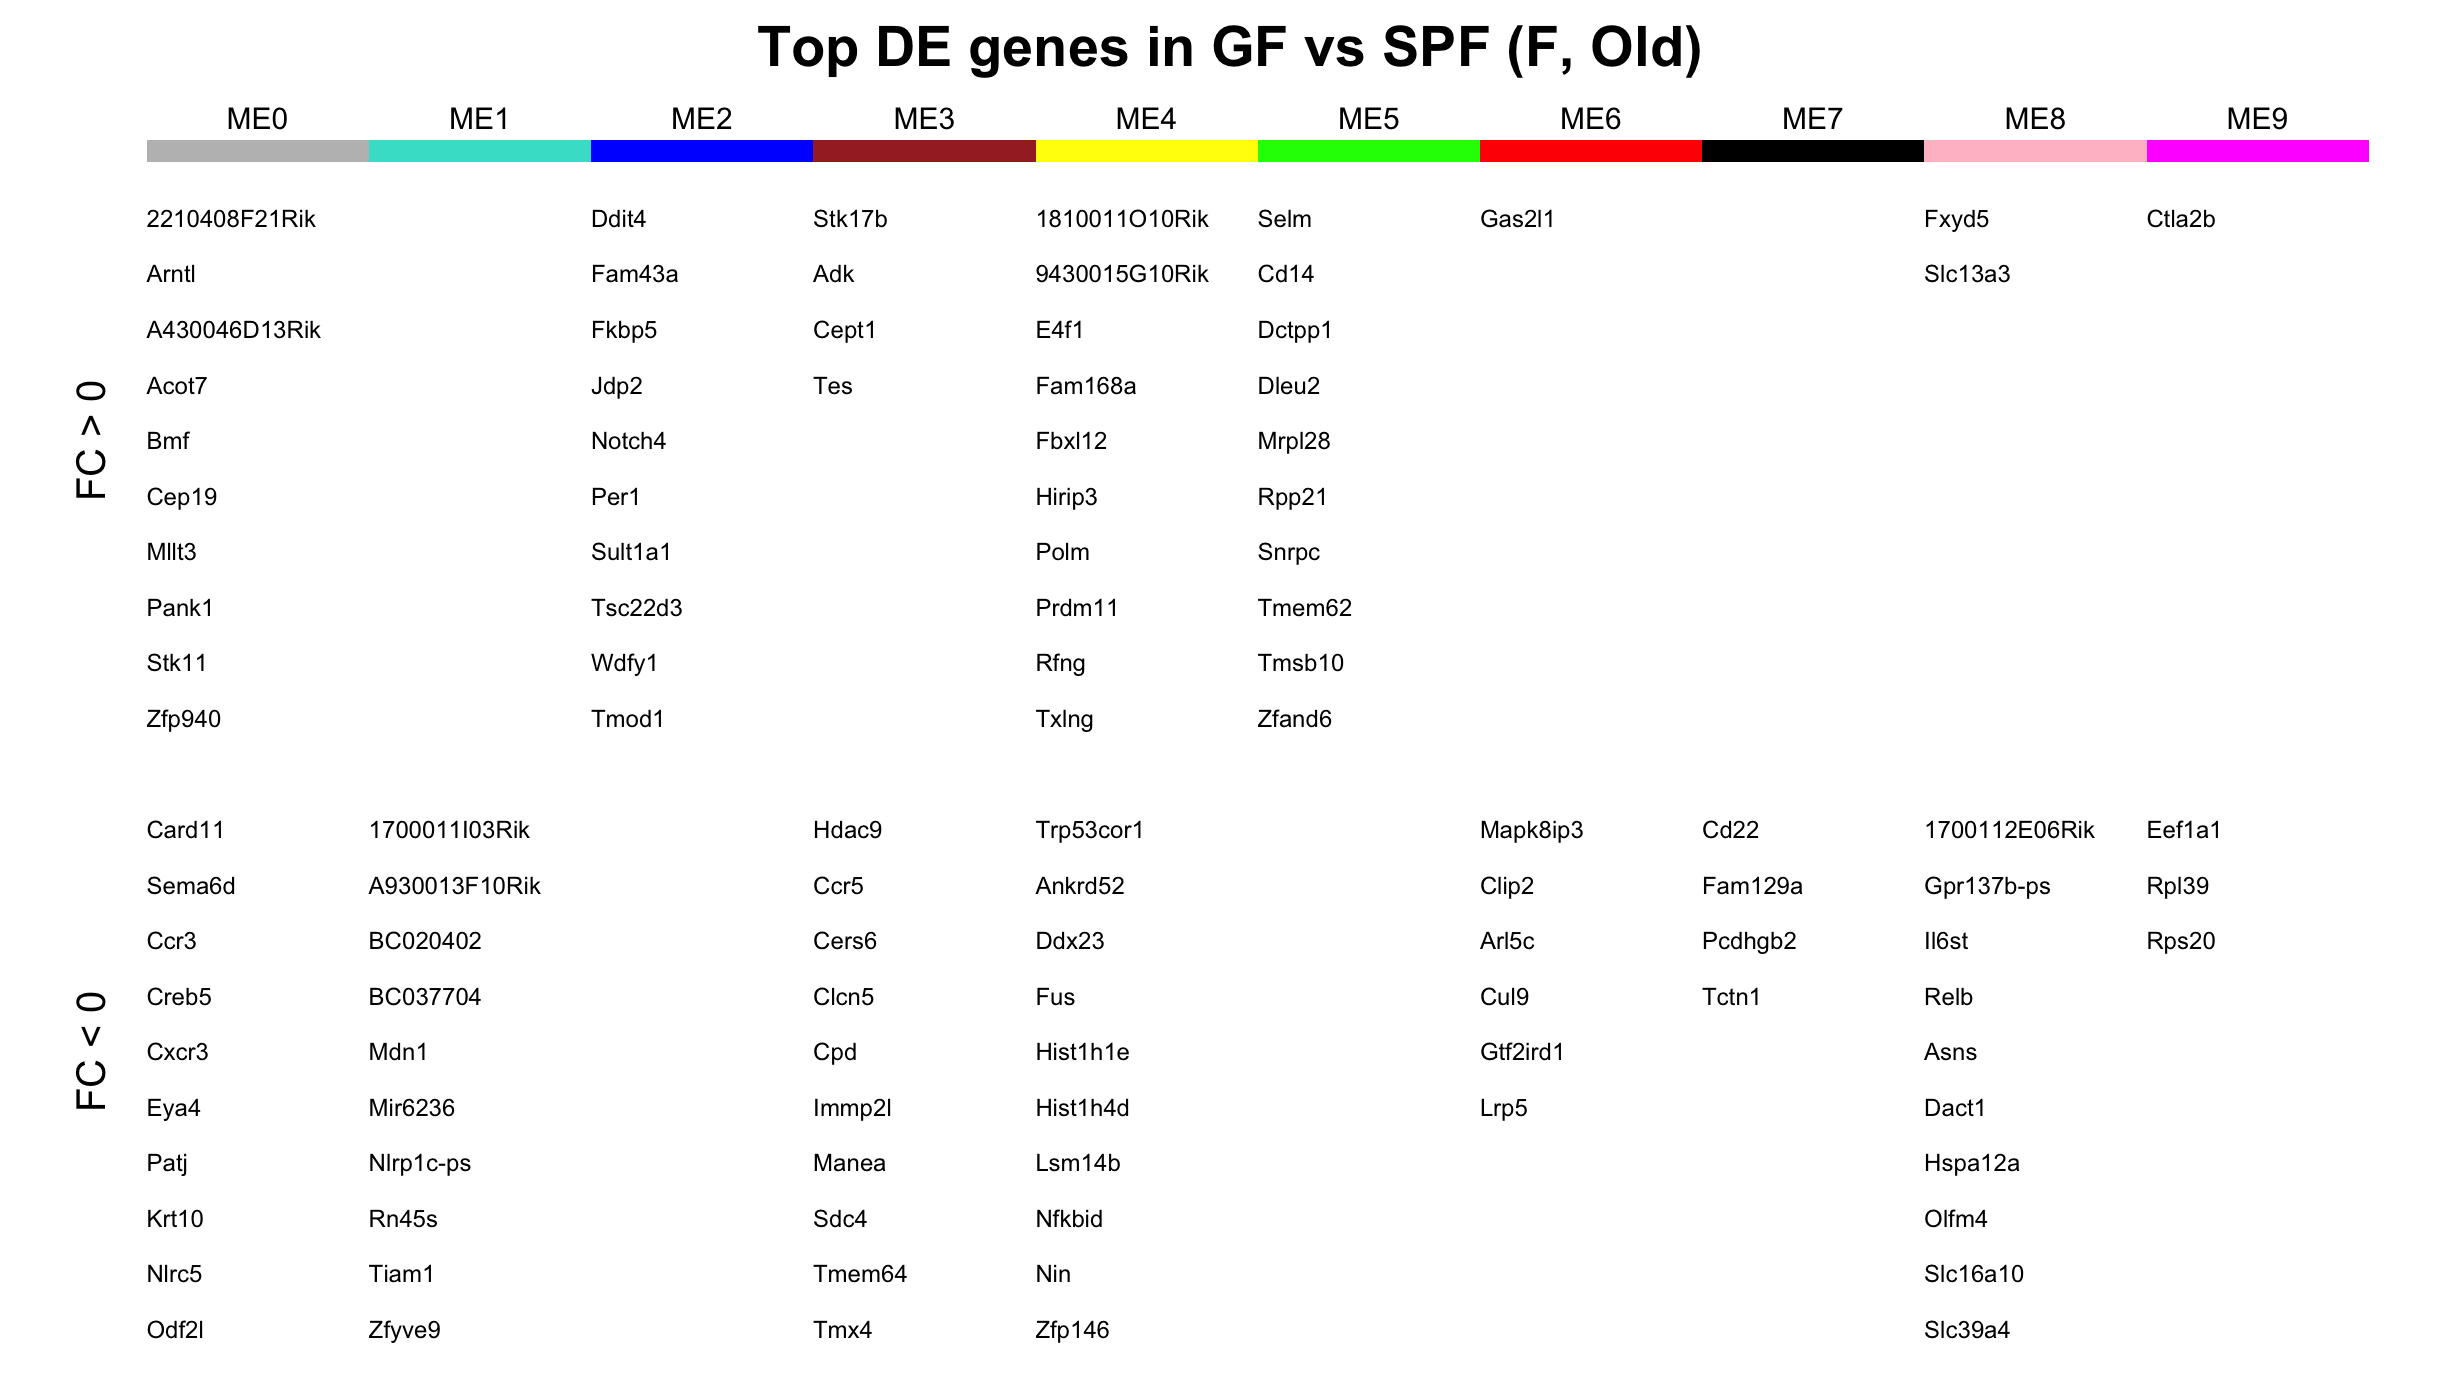

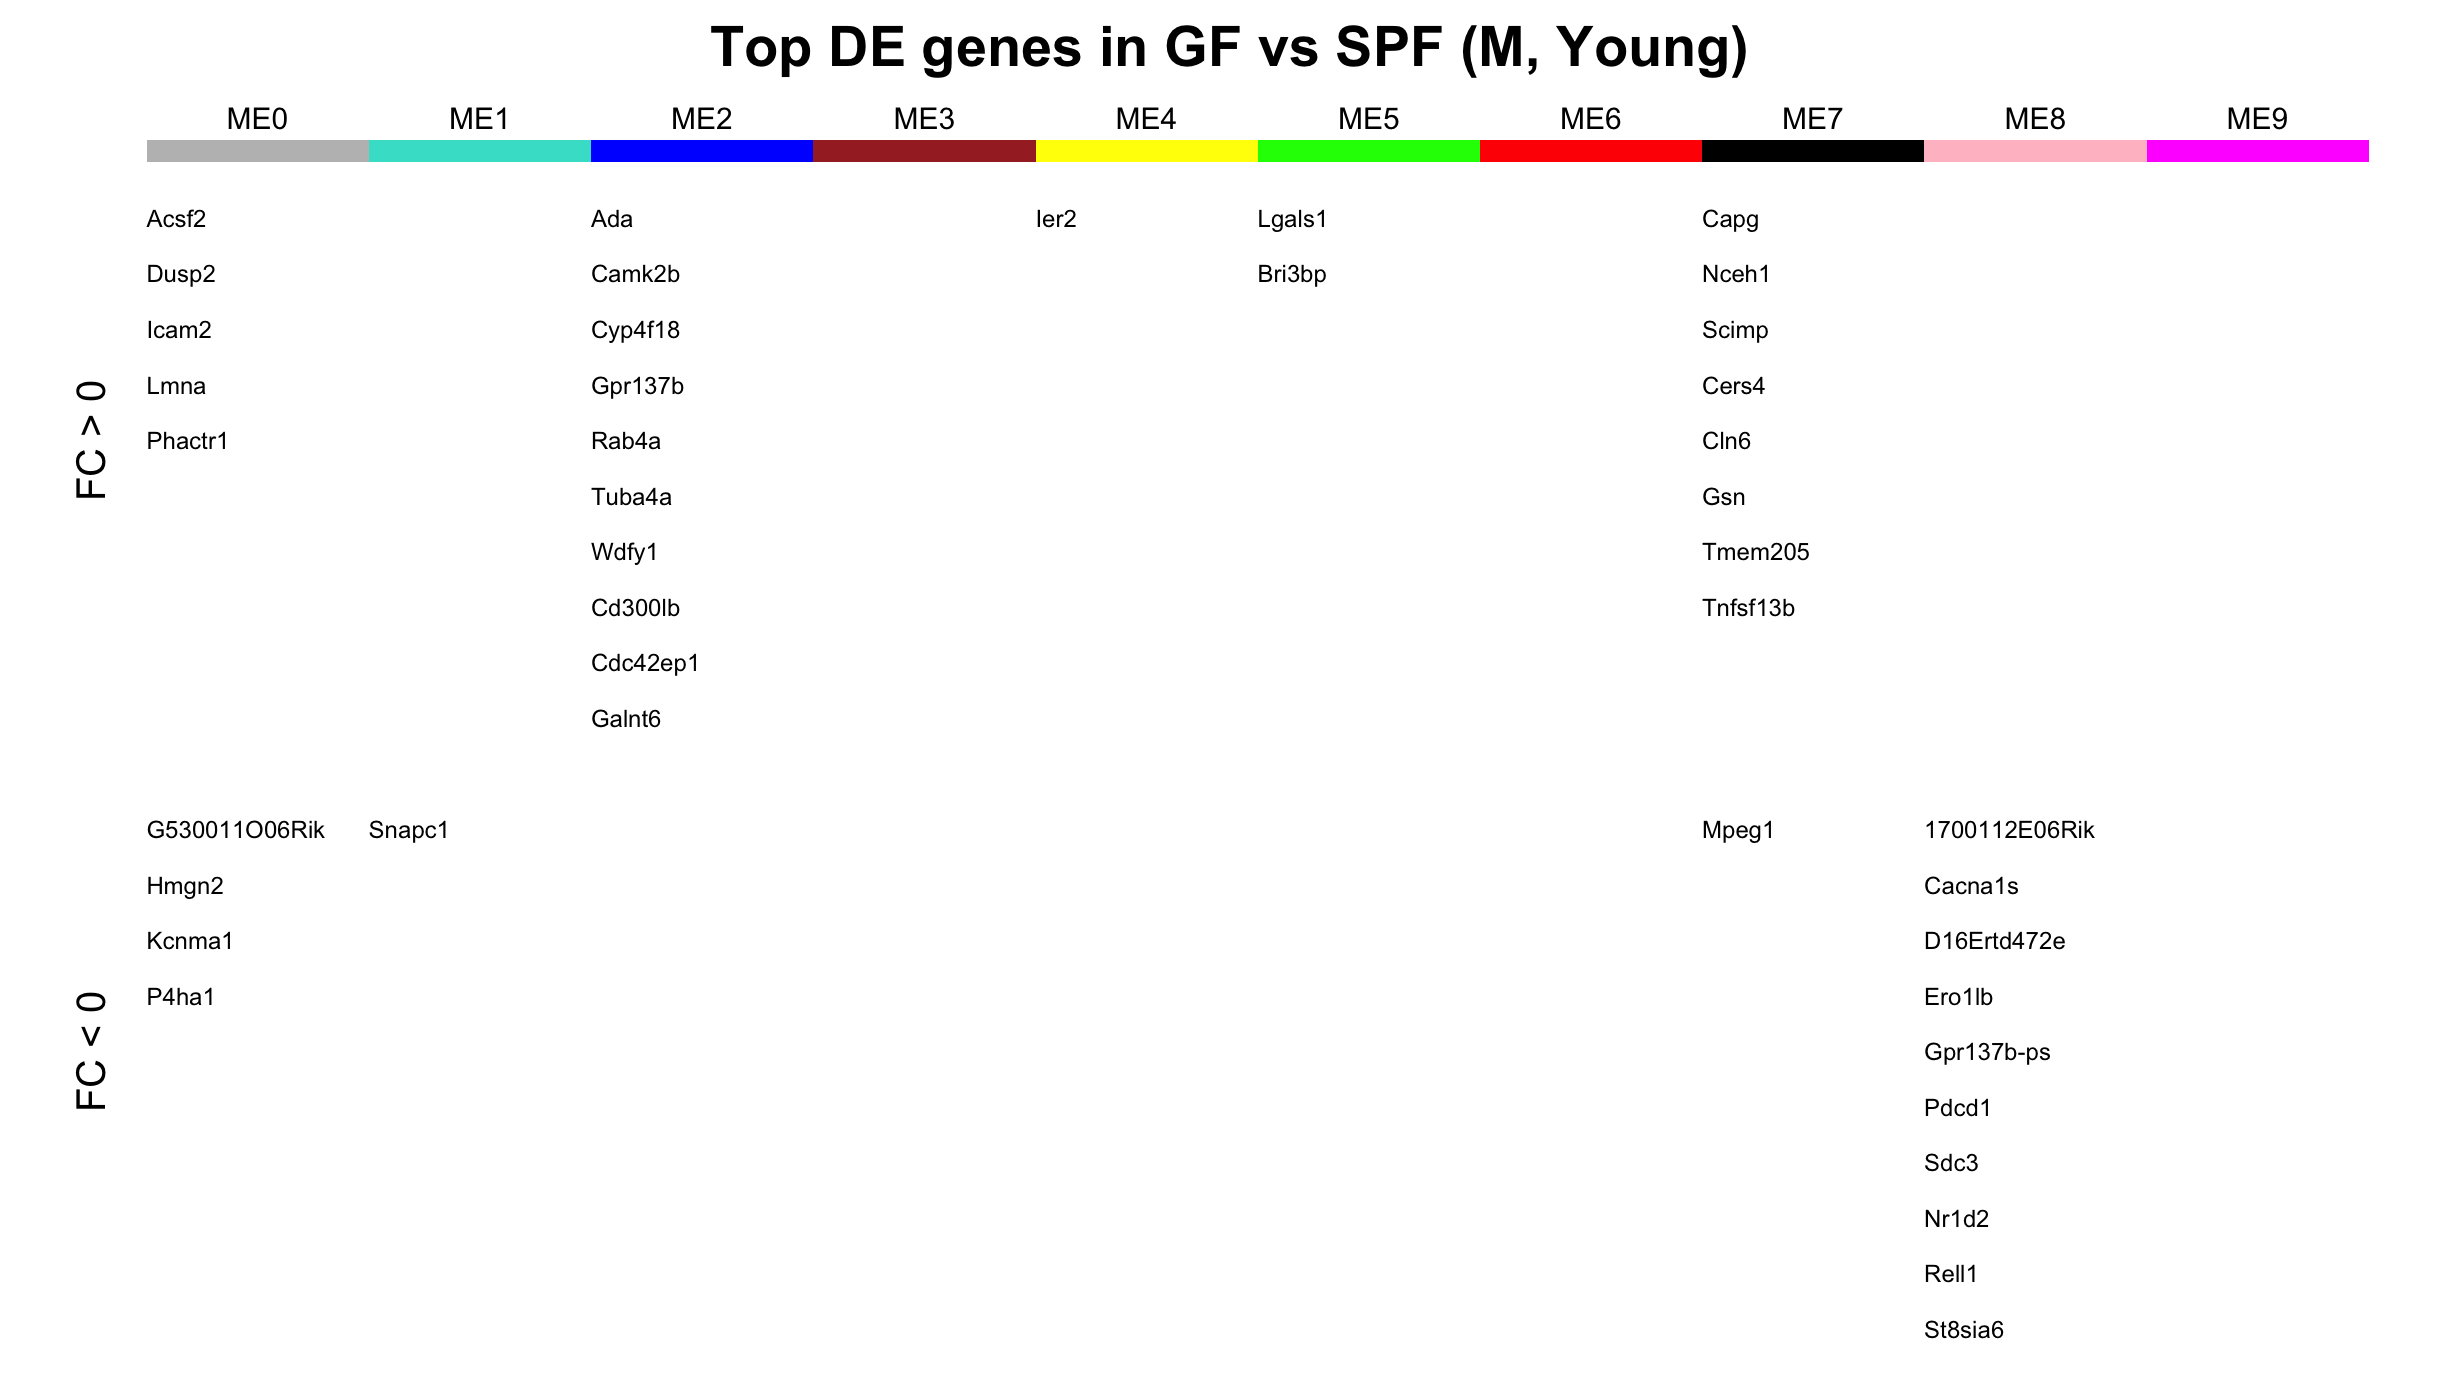

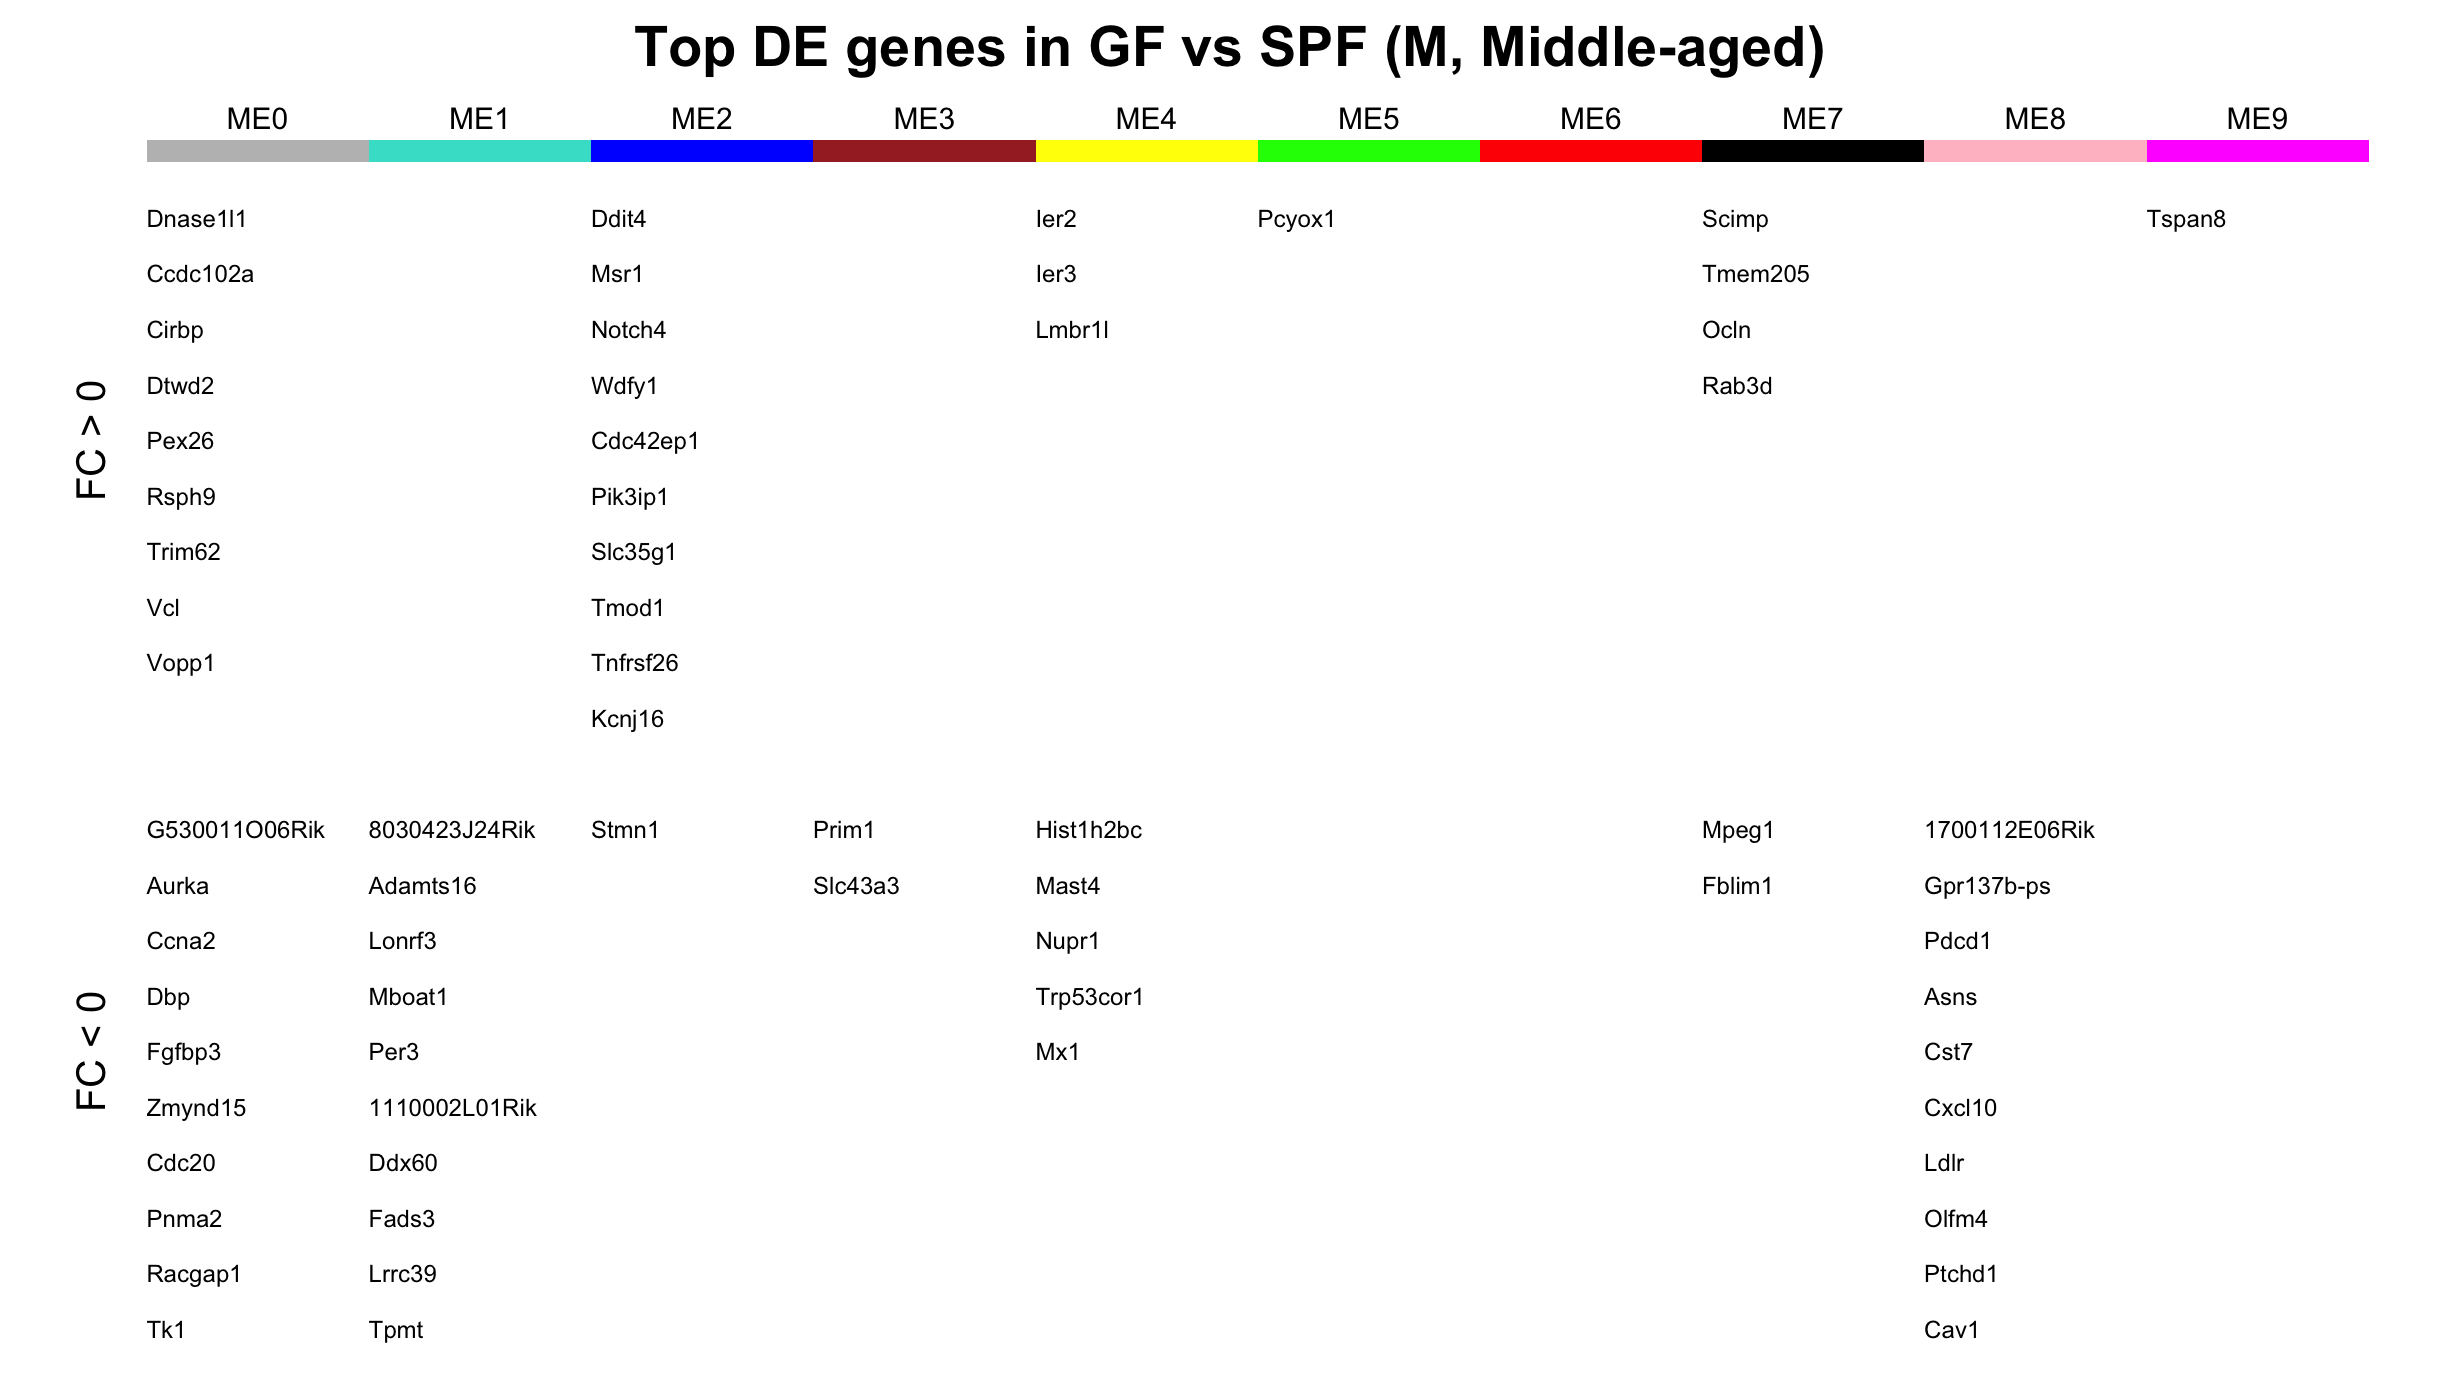

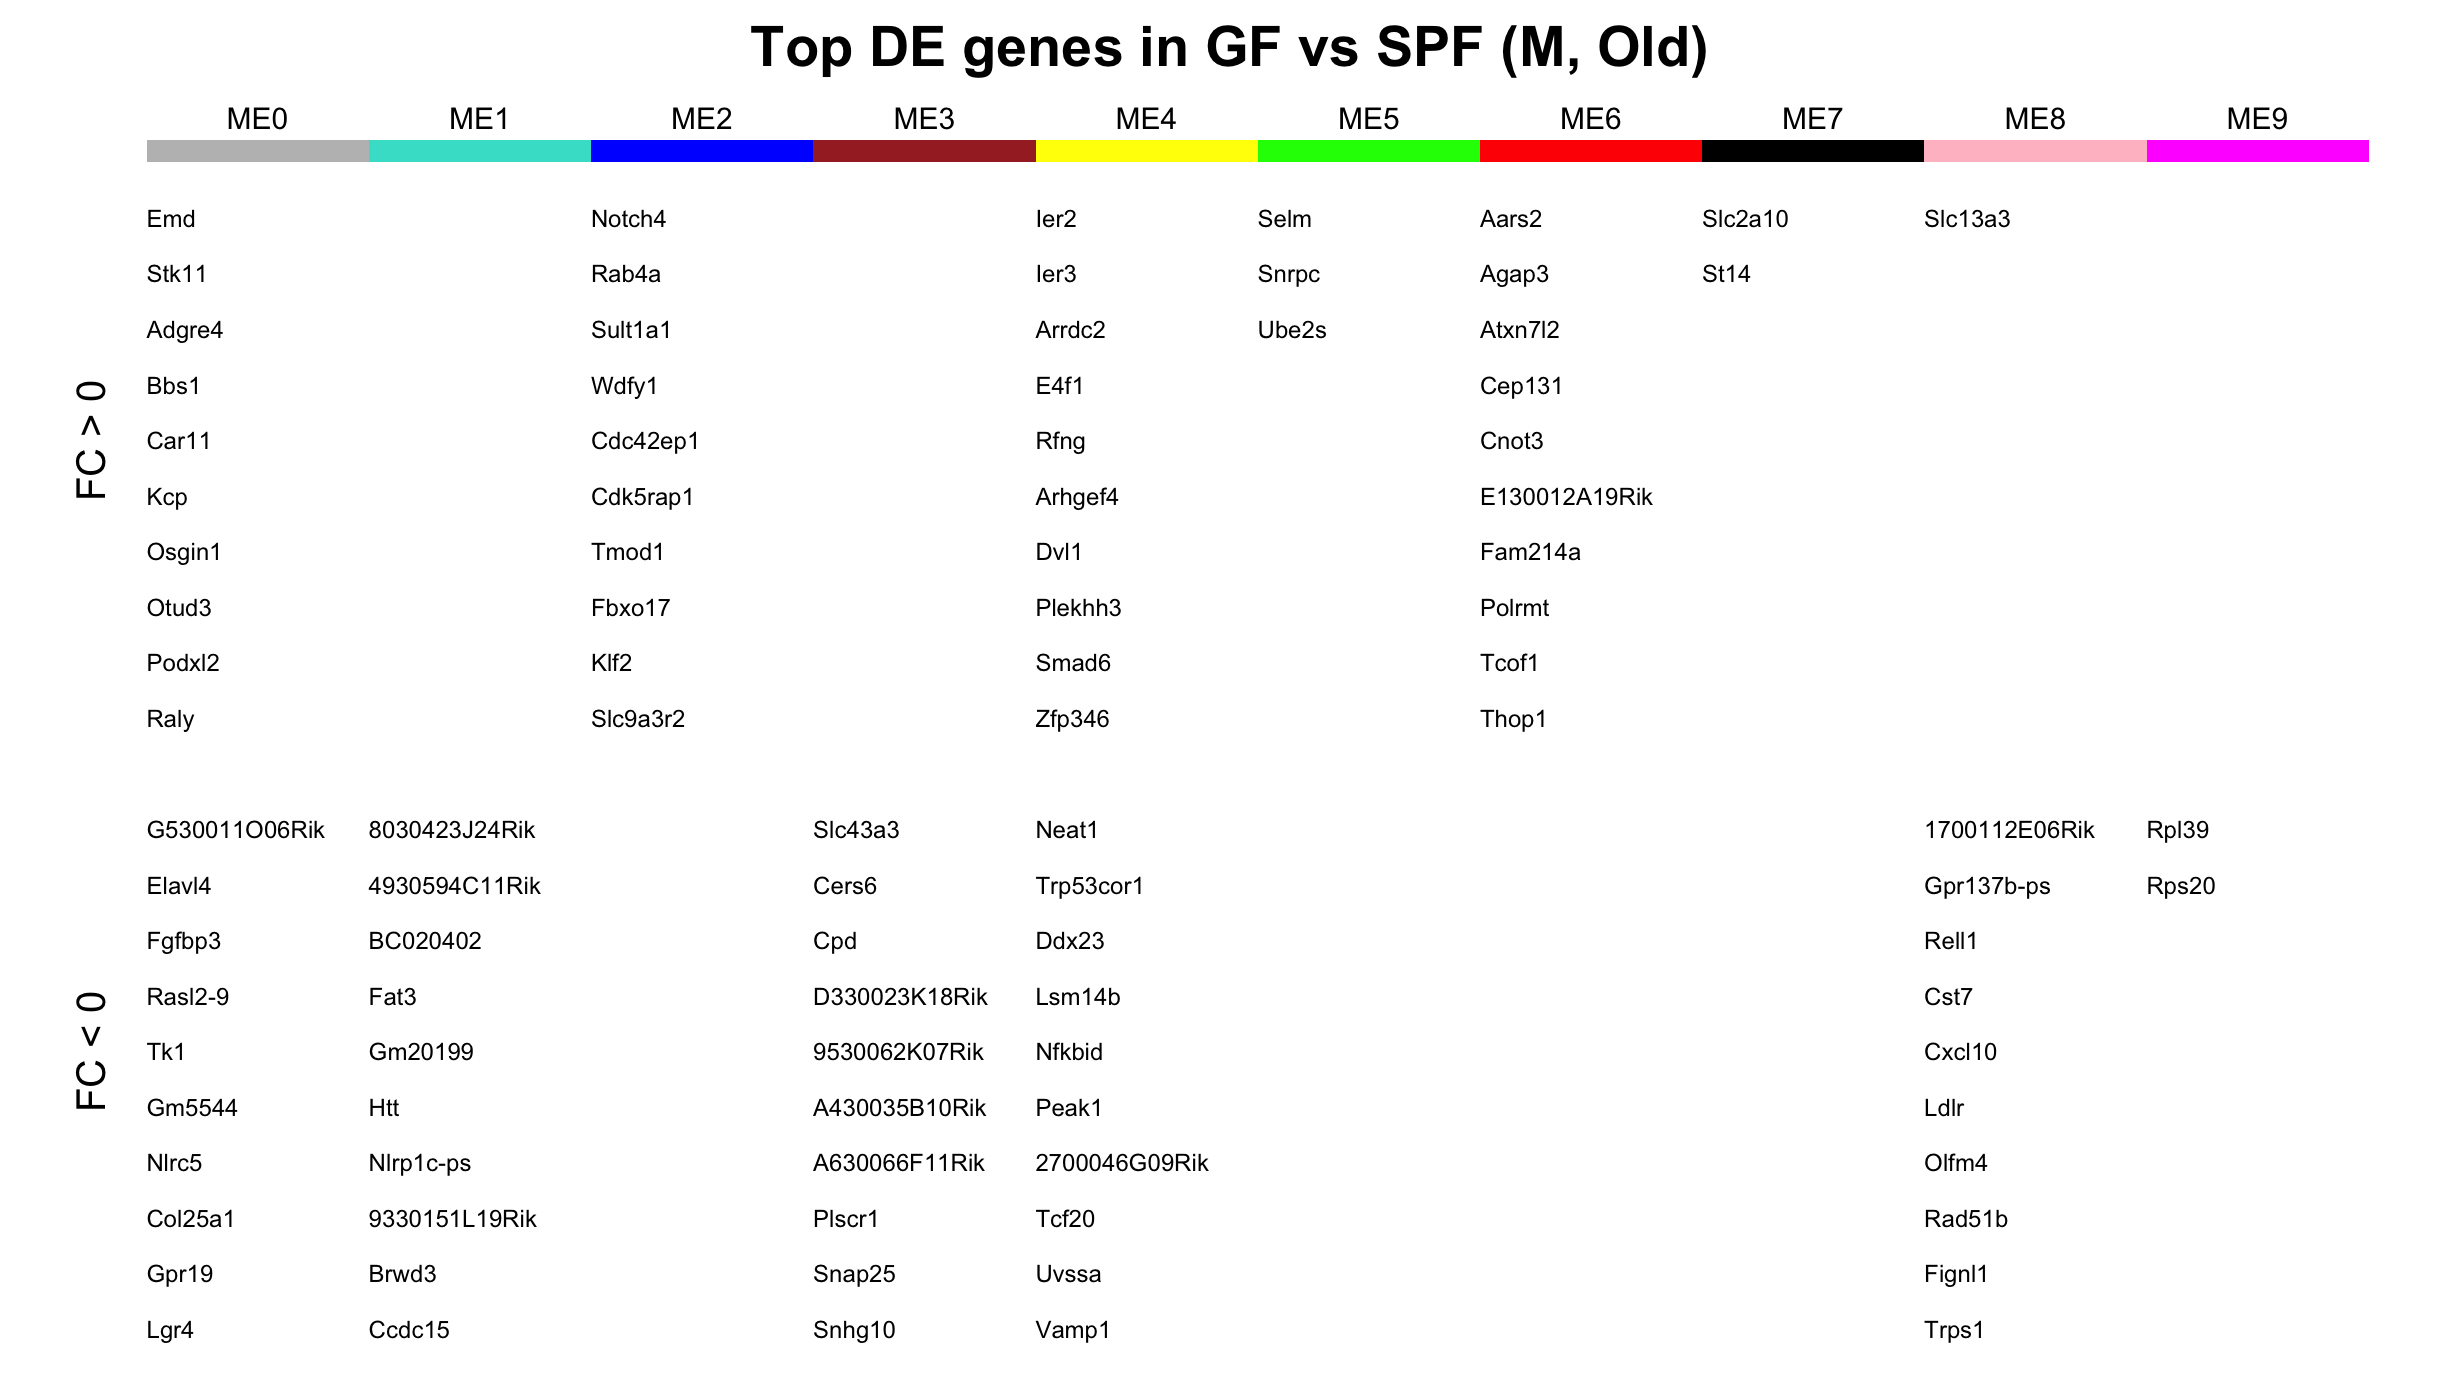

In [22]:
for(comp in comps){
    plot_top_deg_in_modules(deg$sign_fc_deg, comp, genes_in_modules)
}
options(repr.plot.width=7, repr.plot.height=7)

# Enrichment analysis

In [23]:
deg = fit_proba_weighting_function(deg, gene_length)

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”

## GO analysis

In [24]:
deg = extract_GO_terms(deg, dir_path)

Warning message in stack.default(getgo(l$sign_fc_deg$genes, "mm10", "geneSymbol")):
“non-vector elements will be ignored”

### Biological process

Dot-plot with the 10 most significant p-values for the different comparison

Using category as id variables
Using category, type as id variables
Warning message:
“Column `variable` joining factors with different levels, coercing to character vector”

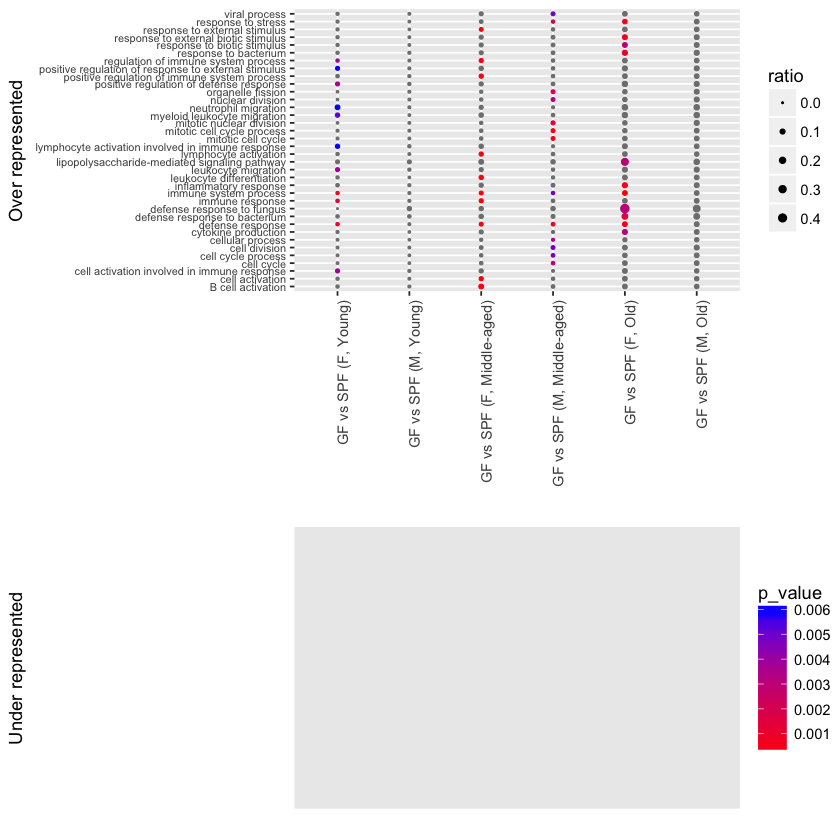

In [25]:
plot_top_go(deg, "BP", 10)

### Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using category as id variables
Using category, type as id variables
Warning message:
“Column `variable` joining factors with different levels, coercing to character vector”

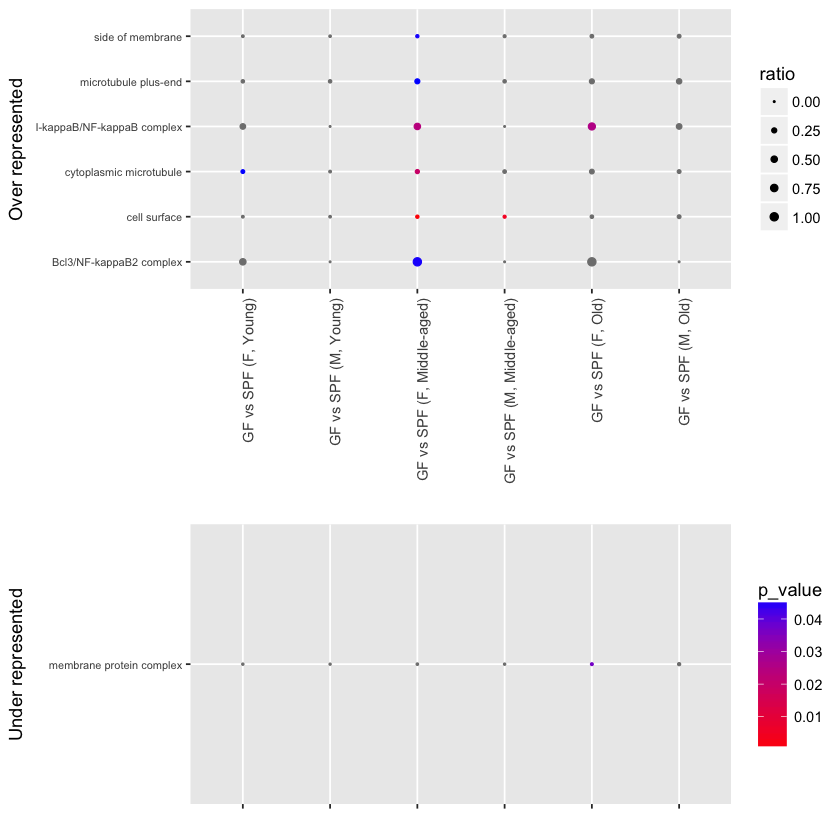

In [26]:
plot_top_go(deg, "CC", 10)

### Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using category as id variables
Using category, type as id variables
Warning message:
“Column `variable` joining factors with different levels, coercing to character vector”

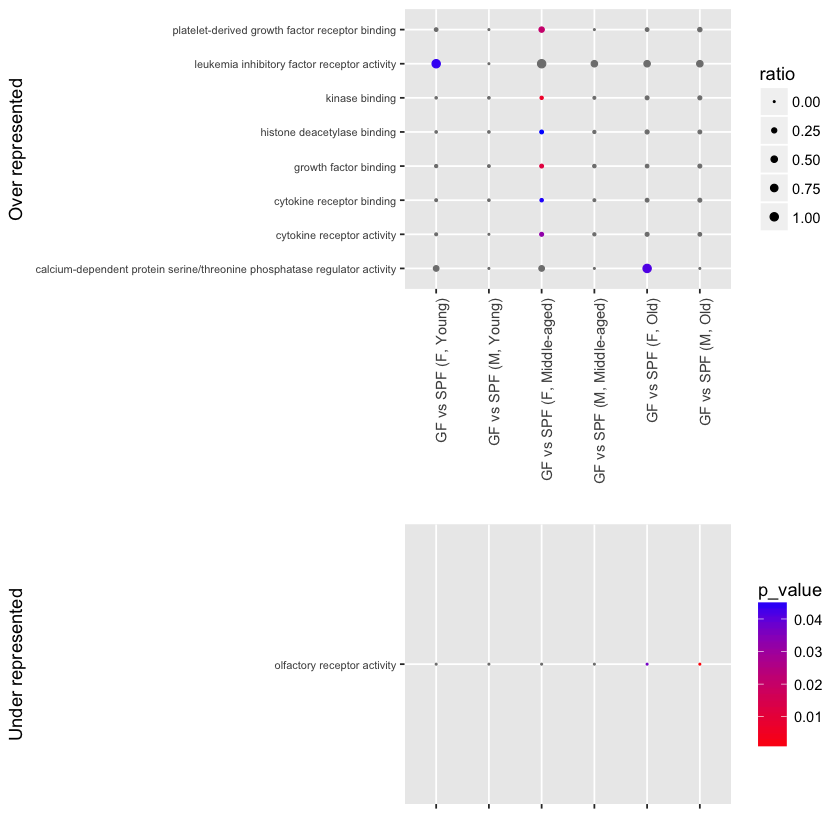

In [27]:
plot_top_go(deg, "MF", 10)

### GO networks

The edge colors in the tree represent the relationship between two nodes. - green: positively regulates
- red: negatively regulates
- black: regulates
- blue: is a
- light blue: part of

#### GF VS SPF (F, Young)

In [28]:
comp = "GF vs SPF (F, Young)"
fp = paste('../results/dge/', dir_path, 'go/GF_VS_SPF_F_Young.png', sep='')
col = get_GO_network_col_all_ont(deg$GO, comp)
dotRes = getAmigoTree(goIDs=col$category,
                      color=col$color,
                      filename=fp,
                      picType="png",
                      saveResult=TRUE)

Warning message:
“Column `values` has different attributes on LHS and RHS of join”Warning message:
“Column `values` has different attributes on LHS and RHS of join”

GO Tree at ["../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_Young.png"](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_Young.png)

#### GF VS SPF (M, Young)

In [29]:
comp = "GF vs SPF (M, Young)"
fp = paste('../results/dge/', dir_path, '/go/GF_VS_SPF_M_Young.png', sep='')
col = get_GO_network_col_all_ont(deg$GO, comp)
dotRes = getAmigoTree(goIDs=col$category,
                      color=col$color,
                      filename=fp,
                      picType="png",
                      saveResult=TRUE)

Warning message:
“Column `values` has different attributes on LHS and RHS of join”Warning message:
“Column `values` has different attributes on LHS and RHS of join”

GO Tree at ["../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_Young.png"](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_Young.png)

#### GF VS SPF (F, Middle-aged)

In [30]:
comp = "GF vs SPF (F, Middle-aged)"
fp = paste('../results/dge/', dir_path, '/go/GF_VS_SPF_F_Middle-aged.png', sep='')
col = get_GO_network_col_all_ont(deg$GO, comp)
dotRes = getAmigoTree(goIDs=col$category,
                      color=col$color,
                      filename=fp,
                      picType="png",
                      saveResult=TRUE)

Warning message:
“Column `values` has different attributes on LHS and RHS of join”Warning message:
“Column `values` has different attributes on LHS and RHS of join”

GO Tree at ["../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_Middle-aged.png"](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_Middle-aged.png)

#### GF VS SPF (M, Middle-aged)

In [31]:
comp = "GF vs SPF (M, Middle-aged)"
fp = paste('../results/dge/', dir_path, '/go/GF_VS_SPF_M_Middle-aged.png', sep='')
col = get_GO_network_col_all_ont(deg$GO, comp)
dotRes = getAmigoTree(goIDs=col$category,
                      color=col$color,
                      filename=fp,
                      picType="png",
                      saveResult=TRUE)

Warning message:
“Column `values` has different attributes on LHS and RHS of join”Warning message:
“Column `values` has different attributes on LHS and RHS of join”

![](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_Middle-aged.png)

GO Tree at ["../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_Middle-aged.png"](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_Middle-aged.png)

#### GF VS SPF (F, Old)

In [32]:
comp = "GF vs SPF (F, Old)"
fp = paste('../results/dge/', dir_path, '/go/GF_VS_SPF_F_Old.png', sep='')
col = get_GO_network_col_all_ont(deg$GO, comp)
dotRes = getAmigoTree(goIDs=col$category,
                      color=col$color,
                      filename=fp,
                      picType="png",
                      saveResult=TRUE)

Warning message:
“Column `values` has different attributes on LHS and RHS of join”Warning message:
“Column `values` has different attributes on LHS and RHS of join”

GO Tree at ["../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_Old.png"](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_F_Old.png)

#### GF VS SPF (M, Old)

In [33]:
comp = "GF vs SPF (M, Old)"
fp = paste('../results/dge/', dir_path, '/go/GF_VS_SPF_M_Old.png', sep='')
col = get_GO_network_col_all_ont(deg$GO, comp)
dotRes = getAmigoTree(goIDs=col$category,
                      color=col$color,
                      filename=fp,
                      picType="png",
                      saveResult=TRUE)

Warning message:
“Column `values` has different attributes on LHS and RHS of join”Warning message:
“Column `values` has different attributes on LHS and RHS of join”

GO Tree at ["../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_Old.png"](../results/dge/type-effect/type_gender_age/go/GF_VS_SPF_M_Old.png)

## KEGG pathways

In [34]:
deg = extract_KEGG_pathways(deg, dir_path)

Warning message in stack.default(getgo(l$sign_fc_deg$genes, "mm10", "geneSymbol", :
“non-vector elements will be ignored”

In [35]:
plot_kegg_pathways(deg$KEGG$over$category,
                   deg$sign_fc_deg,
                   paste('../results/dge/', dir_path, '/kegg/over_repr_kegg/', sep=''))

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 253 rows, data has 346


Pathway graphs available at ../results/dge/type-effect/type_gender_age/over_repr_kegg/

In [ ]:
plot_kegg_pathways(deg$under_represented_KEGG[,"category"],
                   deg$fc_deg,
                   paste('../results/dge/', dir_path, '/kegg/under_repr_kegg/', sep=''))

Pathway graphs available at ../results/dge/type-effect/type_gender_age/under_repr_kegg/